## 2. DATA ANALYSIS & MACHINE LEARNING : CUSTOMER REPORT

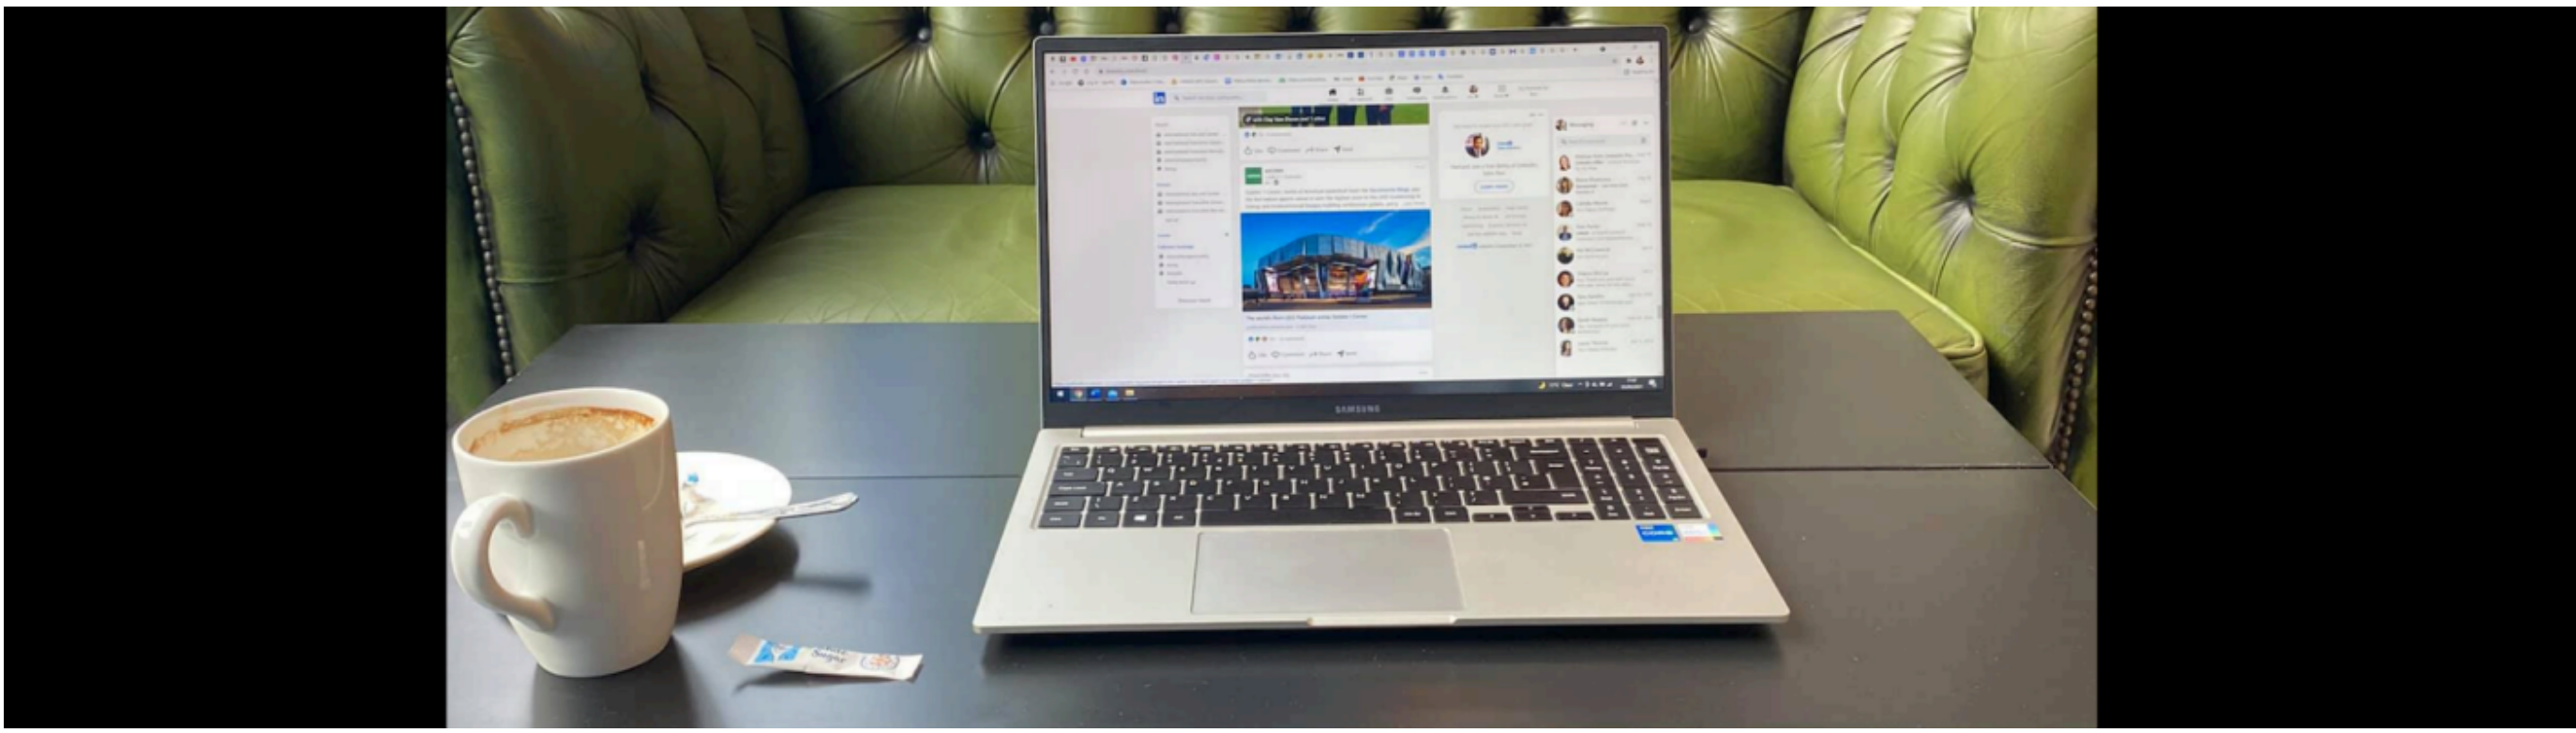

#### HEMANT THAPA

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math as mt
import statistics as st
import statsmodels.api as sm
import scipy.stats as stats
import missingno as msno
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [5]:
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, BayesianRidge, ElasticNet, HuberRegressor, LassoLars, Lasso, LassoCV
from statsmodels.api import OLS, GLM
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from scipy import linalg

### INTRODUCTION

In this report, we present a comprehensive analysis of a dataset containing information about credit card customers. The dataset consists of 400 rows, each representing a unique customer, and several columns providing various attributes about these customers. Our goal is to extract meaningful insights from this data to better understand the characteristics of these customers.

#### STEP 1 : LOADING DATASET

In [9]:
#loading customer dataset
df = pd.read_csv('customer_data.csv')

In [10]:
#The head() function shows the first five observations.
#You can see the columns and the type of data in the columns.
df.head()

,Balance,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity
0,12.240798,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian
1,23.283334,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian
2,22.530409,104.593,7075,514,4,71,11,Male,No,No,Asian
3,27.652811,148.924,9504,681,3,36,11,Female,No,No,Asian
4,16.893978,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian


In [11]:
#This shows the last observations of the dataset
df.tail()

,Balance,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity
395,8.764984,12.096,4100,307,3,32,13,Male,No,Yes,Caucasian
396,9.943838,13.364,3838,296,5,65,17,Male,No,No,African American
397,14.882078,57.872,4171,321,5,67,12,Female,No,Yes,Caucasian
398,12.001071,37.728,2525,192,1,44,13,Male,No,Yes,Caucasian
399,10.159598,18.701,5524,415,5,64,7,Female,No,No,Asian


#### STEP 2 : FIND ERRORS OR MISSING VALUES

In [13]:
df.isnull().any() #finding error or missing values

Balance      False
Income       False
Limit        False
Rating       False
Cards        False
Age          False
Education    False
Gender       False
Student      False
Married      False
Ethnicity    False
dtype: bool

In [14]:
df.isnull().sum()

Balance      0
Income       0
Limit        0
Rating       0
Cards        0
Age          0
Education    0
Gender       0
Student      0
Married      0
Ethnicity    0
dtype: int64

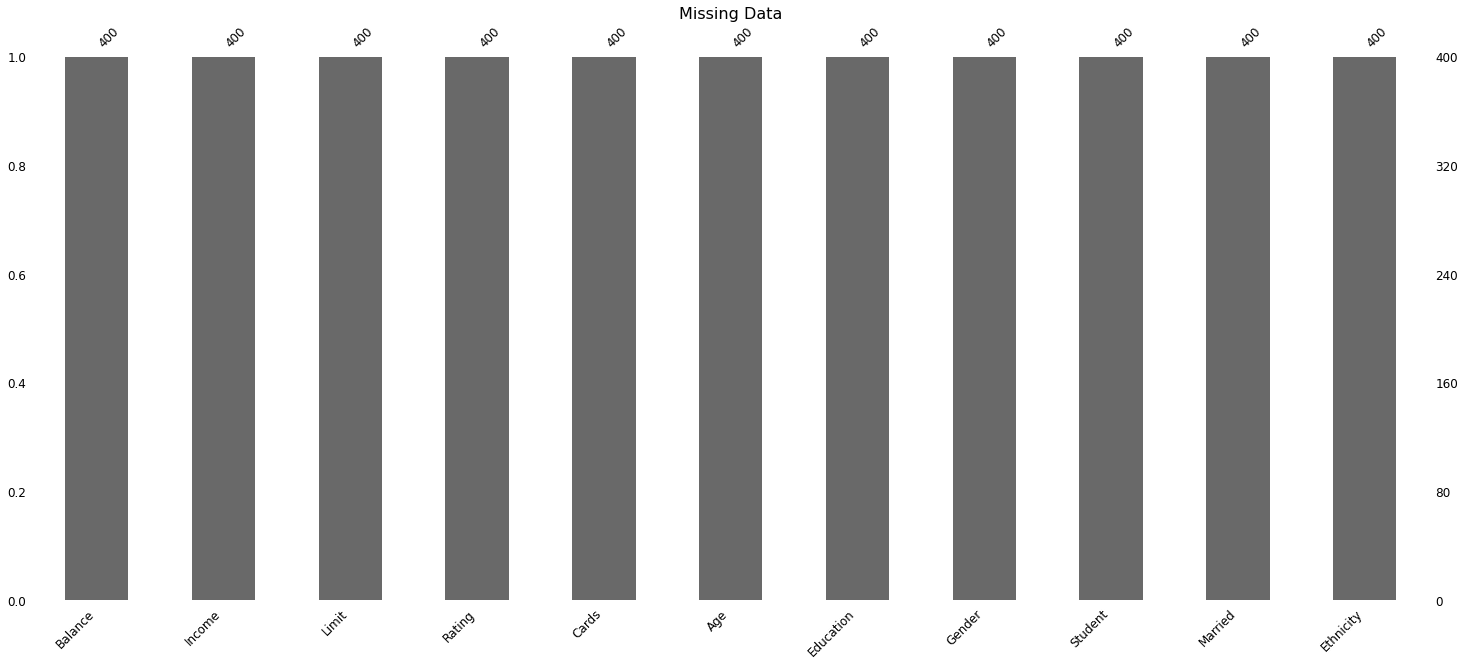

In [15]:
msno.bar(df, fontsize=12, labels=True)
plt.title('Missing Data', fontsize=16)
plt.xticks(rotation=45)
plt.show()

There are no missing or null values in the dataset. Each column, represented by the variable names Balance, Income, Limit, Rating, Cards, Age, Education, Gender, Student, Married, and Ethnicity, contains complete and valid data. This suggests that the dataset is clean and ready for analysis without the need for imputation or data cleaning procedures.

In [17]:
#Inspecting overall dataset
findcolumns=df.columns
for word in findcolumns:
    print("\033[1m column %s unique values are : \n"% word,df[word].unique(),"\n","-------")

 column Balance unique values are : 
 [12.24079848 23.28333392 22.53040888 27.65281071 16.89397849 22.48617761
 10.57451644 14.57620435  7.9380903  17.75696487 13.99498953  9.46730771
 19.21880032 10.69898374  9.89353297 10.04512813 15.24877195 12.96088475
 11.57377805 13.23624893  9.85310041 13.59577602  9.41650944 16.30253342
  6.16094815  8.23251395 14.95991554 12.60846077 35.2710115  14.00776959
 10.20152348 11.46486408 26.03941606 10.05131528  9.25014452 10.2460781
 16.87621918 11.12620322  8.51728207  7.62376227 12.02964599 25.29100796
 13.1236689  12.31997614 12.05959563 18.65366124 10.80582469 11.48856524
 13.43346836 14.00763253 10.1073556  13.01076763 11.92434223  9.72819204
  7.66566199 11.4543372  17.05369062 18.15548849  9.18079694 16.42409471
 13.29728253 10.03231624 10.98723639  9.52966275 10.88325562  7.82543588
 22.78102775  7.82361468 10.73817573 14.14508391  9.05880571 15.2755303
  4.99577443 11.66506263  7.70287406 12.86976875 10.38747181 11.52386258
 20.73084824  9

In [18]:
#Checking data types
df.dtypes

Balance      float64
Income       float64
Limit          int64
Rating         int64
Cards          int64
Age            int64
Education      int64
Gender        object
Student       object
Married       object
Ethnicity     object
dtype: object

In [19]:
#By using the index function below, we know the range of the dataset is from 0-400.
df.index

RangeIndex(start=0, stop=400, step=1)

In [20]:
# This allows you to see the columns in the data frame.
df.columns

Index(['Balance', 'Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education',
       'Gender', 'Student', 'Married', 'Ethnicity'],
      dtype='object')

### STEP 3 : DATA ANALYSIS

#### SUMMARY STATISTICS FOR KEY VARIABLES

#### The following table summarizes key statistics for the dataset across seven numerical variables:

In [24]:
#A quick statistic summary of your data. As you can see, the statistic is calculated for only columns with numerical values.
df.describe()

,Balance,Income,Limit,Rating,Cards,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,13.429175,45.218885,4735.600000,354.940000,2.957500,55.667500,13.450000
std,5.669256,35.244273,2308.198848,154.724143,1.371275,17.249807,3.125207
min,3.749403,10.354000,855.000000,93.000000,1.000000,23.000000,5.000000
25%,9.891439,21.007250,3088.000000,247.250000,2.000000,41.750000,11.000000
50%,11.779615,33.115500,4622.500000,344.000000,3.000000,56.000000,14.000000
75%,15.236961,57.470750,5872.750000,437.250000,4.000000,70.000000,16.000000
max,38.785123,186.634000,13913.000000,982.000000,9.000000,98.000000,20.000000


#### Key Observations:

1. Balance: The average balance among customers is approximately 13.43 units, with a standard deviation of 5.67 units. Balances vary from a minimum of 3.75 units to a maximum of 38.79 units.

2. Income: The average income of customers is approximately 45.22 units, with a standard deviation of 35.24 units. Incomes range from a minimum of 10.35 units to a maximum of 186.63 units.

3. Limit: Customers have an average credit limit of 4,735.60 units, with a standard deviation of 2,308.20 units. Credit limits range from a minimum of 855 units to a maximum of 13,913 units.

4. Rating: The average credit rating of customers is approximately 354.94 units, with a standard deviation of 154.72 units. Ratings range from a minimum of 93 units to a maximum of 982 units.

5. Cards: On average, customers have nearly 3 credit cards, with a minimum of 1 card and a maximum of 9 cards.

6. Age: The average age of customers is 55.67 years, with a standard deviation of 17.25 years. Customer ages range from 23 to 98 years.

7. Education: The average education level is 13.45 years, with a standard deviation of 3.13 years. Education levels vary from a minimum of 5 years to a maximum of 20 years.

#### Top ten customer with higest income in dataset.

In [28]:
#sorting observation with top highest income in dataset
df.sort_values(by='Income',ascending=False)[:10]

,Balance,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity
28,35.271011,186.634,13414,949,2,41,14,Female,No,Yes,African American
323,33.745580,182.728,13913,982,4,98,17,Male,No,Yes,Caucasian
355,34.034656,180.682,11966,832,2,58,8,Female,No,Yes,African American
261,38.785123,180.379,9310,665,3,67,8,Female,Yes,Yes,Asian
275,30.212080,163.329,8732,636,3,50,14,Male,No,Yes,Caucasian
347,32.155557,160.231,10748,754,2,69,17,Male,No,No,Caucasian
184,27.976421,158.889,11589,805,1,62,17,Female,No,Yes,Caucasian
85,29.370645,152.298,12066,828,4,41,12,Female,No,Yes,Asian
209,28.142850,151.947,9156,642,2,91,11,Female,No,Yes,African American
339,30.355899,149.316,10278,707,1,80,16,Male,No,No,African American


1. Diverse Demographics: The selected customer profiles reflect a diverse range of demographics, including different genders, ages, and ethnicities. This diversity highlights the inclusivity of the credit card customer base.

2. Education Levels Vary: The education levels among these customers vary, with some having completed as many as 17 years of education and others having completed 8 years. This suggests a wide range of educational backgrounds and potential career stages.

3. Financial Responsibility: Customers in this subset exhibit varying levels of financial responsibility, as indicated by their credit card balances, incomes, and credit limits. For example, Customer 4 maintains a high balance, indicating responsible credit use, while Customer 7 has a relatively low balance.

4. Marital Status: A majority of these customers are married, but there is also a representation of single customers. Understanding the marital status of customers can help tailor financial products and services to their specific needs.

5. No Student Status: None of the selected customers are students, suggesting that they may be primarily working professionals or retirees. This information can be valuable for marketing and product targeting.

6. High Credit Rating: Some customers have notably high credit ratings, such as Customer 2 with a rating of 982. High credit ratings can be indicative of responsible financial behavior.

7. Varied Number of Cards: The number of credit cards owned by these customers varies, with some having only one card and others having up to four cards. This indicates different preferences for managing credit.

8. Income Disparity: There is a significant income disparity among these customers, with incomes ranging from around 150 units to nearly 190 units. Such disparities underscore the importance of offering a range of credit card options to cater to different income levels.

9. Loyal Customers: The fact that these customers are part of this subset suggests that they have been loyal to the bank or credit card issuer for some time. Building and maintaining customer loyalty is crucial in the competitive credit card industry.

10. Potential for Personalized Services: By understanding these customer profiles in more detail, financial institutions can tailor their services and marketing efforts to better meet the unique financial needs and preferences of each customer.

In [30]:
df[:10]

,Balance,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity
0,12.240798,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian
1,23.283334,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian
2,22.530409,104.593,7075,514,4,71,11,Male,No,No,Asian
3,27.652811,148.924,9504,681,3,36,11,Female,No,No,Asian
4,16.893978,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian
5,22.486178,80.180,8047,569,4,77,10,Male,No,No,Caucasian
6,10.574516,20.996,3388,259,2,37,12,Female,No,No,African American
7,14.576204,71.408,7114,512,2,87,9,Male,No,No,Asian
8,7.938090,15.125,3300,266,5,66,13,Female,No,No,Caucasian
9,17.756965,71.061,6819,491,3,41,19,Female,Yes,Yes,African American


The purpose of creating histograms and bell curves (probability density functions) for data is to visualize the distribution of the data and assess its characteristics.

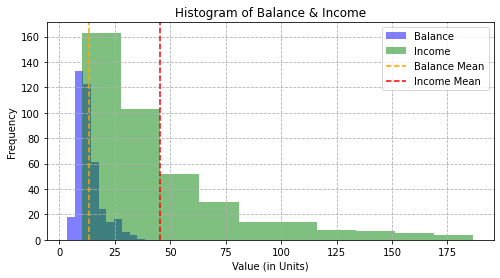

In [32]:
#histogram for Balance and Income
plt.figure(figsize=(8, 4))
plt.hist(df['Balance'], label='Balance', alpha=0.5, bins=10, color='blue')
plt.hist(df['Income'], label='Income', alpha=0.5, bins=10, color='green')
plt.axvline(df['Balance'].mean(), label='Balance Mean', ls='--', color='orange')
plt.axvline(df['Income'].mean(), label='Income Mean', ls='--', color='red')
plt.title('Histogram of Balance & Income')
plt.xlabel('Value (in Units)')
plt.ylabel('Frequency')
plt.grid(True, ls='--')
plt.legend()
plt.show()

#### CALCULATING QUARTILE FOR VALIDATING DATA SKEWNESS.

#### <font color = blue> 1. Data Distribution <font>

Skewness provides insights into the shape of the data distribution. It helps you understand whether the data is symmetric or asymmetric, and the direction of the asymmetry (left or right skew).

In [36]:
mean_balance = df['Balance'].mean()
mean_income = df['Income'].mean()

median_balance = df['Balance'].median()
median_income = df['Income'].median()

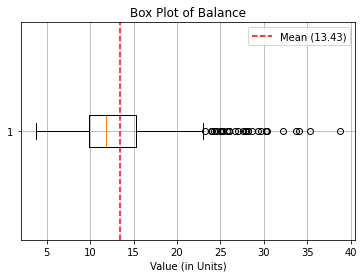

In [37]:
plt.figure(figsize=(6, 4))
plt.boxplot(df['Balance'], vert=False)
plt.axvline(mean_balance, color='red', linestyle='--', label=f'Mean ({mean_balance:.2f})')
plt.title('Box Plot of Balance')
plt.xlabel('Value (in Units)')
plt.grid(True)
plt.legend()
plt.show()

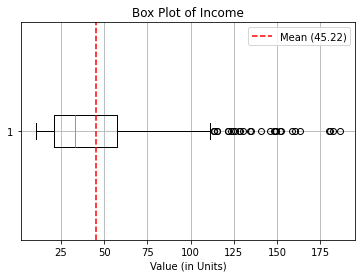

In [38]:
plt.figure(figsize=(6, 4))
plt.boxplot(df['Income'], vert=False)
plt.axvline(mean_income, color='red', linestyle='--', label=f'Mean ({mean_income:.2f})')
plt.title('Box Plot of Income')
plt.xlabel('Value (in Units)')
plt.grid(True)
plt.legend()
plt.show()

Our Balance and Income data is positive or right skew because median toward bottom of data, where Median < Mean. Upper quartile is larger than lower quartile.

#### <font color = blue> 2. Central Tendency <font>

 Skewness impacts measures of central tendency. In positively skewed data, the mean is typically greater than the median, and in negatively skewed data, the mean is typically less than the median.

In [42]:
print(f'Mean Balane :{mean_balance}')
print(f'Median Balane :{median_balance}')
print()
print(f'Mean Income :{mean_income}')
print(f'Median Income :{median_income}')

Mean Balane :13.429174748332592
Median Balane :11.7796145580453

Mean Income :45.218885000000036
Median Income :33.1155


##### Balance variable:

1. The mean balance is approximately 13.43 units.

3. The median balance (Q2) is approximately 11.78 units.

Since the mean is greater than the median, it indicates that the "Balance" data is positively skewed. In positively skewed data, the tail on the right side (larger values) is longer, which pulls the mean to the right of the median.

#### Income variable:

1. The mean income is approximately 45.22 units.
   
2. The median income (Q2) is approximately 33.12 units.
   
Similar to the "Balance" data, the mean is greater than the median for "Income," suggesting positive skewness.

 #### <font color = blue> 3. Skewness by comparing quartile ranges (IQR) around the median. <font>

When Q3−Q2 is greater than Q2−Q1, it suggests that the right tail is longer, indicating positive skewness.¶

![image.png](attachment:d97fd697-d188-4ae1-b7fe-ef472bd7fc16.png)

In [47]:
q1_balance, q2_balance, q3_balance, q4_balance = np.percentile(df['Balance'], [25, 50, 75, 100])

In [48]:
print(f'Q1 Balance (25th percentile): {q1_balance}')
print(f'Q2 Balance (50th percentile, Median): {q2_balance}')
print(f'Q3 Balance (75th percentile): {q3_balance}')
print(f'Q4 Balance (100th percentile, Max): {q4_balance}')

Q1 Balance (25th percentile): 9.89143859287277
Q2 Balance (50th percentile, Median): 11.7796145580453
Q3 Balance (75th percentile): 15.236961180383625
Q4 Balance (100th percentile, Max): 38.7851230052754


In [49]:
if (q3_balance - q2_balance) > (q2_balance - q1_balance):
    print("Positive skew")
else:
    print("Not positive skew")

Positive skew


In [50]:
q1_income, q2_income, q3_income, q4_income = np.percentile(df['Income'], [25, 50, 75, 100])

In [51]:
print(f'Q1 Income (25th percentile): {q1_income}')
print(f'Q2 Income (50th percentile, Median): {q2_income}')
print(f'Q3 Income (75th percentile): {q3_balance}')
print(f'Q4 Income (100th percentile, Max): {q4_income}')

Q1 Income (25th percentile): 21.00725
Q2 Income (50th percentile, Median): 33.1155
Q3 Income (75th percentile): 15.236961180383625
Q4 Income (100th percentile, Max): 186.634


In [52]:
if (q3_income - q2_income) > (q2_income - q1_income):
    print("Positive skew")
else:
    print("Not positive skew")

Positive skew


#### <font color = blue> 4. Pearson’s median skewness. <font>

![image.png](attachment:4c5547ff-e998-41d8-801b-7cf66a05217f.png)

In [55]:
class BalanceSkewness:
    """
    Class for calculating and interpreting skewness of a data column.

    Parameters:
    - data: DataFrame containing the data.
    - column_name: Name of the column for which skewness will be calculated.

    Note: If this value is between:
    · -0.5 and 0.5, the distribution of the value is almost symmetrical
    · -1 and -0.5, the data is negatively skewed, and if it is between 0.5 to 1, the data is positively skewed.
    · If the skewness is lower than -1 (negatively skewed) or greater than 1 (positively skewed), the data is highly skewed.
    """
    def __init__(self, data, column_name):
        self.data = data
        self.column_name = column_name

    def calculate_skewness(self):
        #skewness using Pearson’s median skewness formula
        mean = self.data[self.column_name].mean()
        median = self.data[self.column_name].median()
        mode = self.data[self.column_name].mode().iloc[0]  # Get the first mode if it exists
        print('Mean: ',mean)
        print('Median: ',median)
        print('Mode: ',mode)

        #skewness using the Pearson's median formula
        pearson_skewness = (3 * (mean - median)) / self.data[self.column_name].std()
        return pearson_skewness

    def interpret_skewness(self, skewness_value):
        #skewness based on your conditions
        if skewness_value > 1:
            skewness_result = "Highly positively skewed"
            print("Interpretation of skewness:", skewness_result)
        elif 0.5 <= skewness_value <= 1:
            skewness_result = "Positively skewed"
            print("Interpretation of skewness:", skewness_result)
        elif skewness_value < -1:
            skewness_result = "Highly negatively skewed"
            print("Interpretation of skewness:", skewness_result)
        elif -1 <= skewness_value <= -0.5:
            skewness_result = "Negatively skewed"
            print("Interpretation of skewness:", skewness_result)
        else:
            skewness_result = "No skew (symmetric distribution)"
            print("Interpretation of skewness:", skewness_result)

        return skewness_result

    def analyse_skewness(self):
        #skewness using Pearson's median skewness formula
        pearson_skewness = self.calculate_skewness()

        # Interpret the skewness
        self.interpret_skewness(pearson_skewness)

        print(f'Pearson Skewness : {pearson_skewness}')

In [56]:
skewness_calculator = BalanceSkewness(df, 'Balance')
skewness_calculator.analyse_skewness()

Mean:  13.429174748332592
Median:  11.7796145580453
Mode:  3.74940297573192
Interpretation of skewness: Positively skewed
Pearson Skewness : 0.8728976895224816


In [57]:
skewness_calculator = BalanceSkewness(df, 'Income')
skewness_calculator.analyse_skewness()

Mean:  45.218885000000036
Median:  33.1155
Mode:  23.793
Interpretation of skewness: Highly positively skewed
Pearson Skewness : 1.0302426958824606


In [58]:
# help(BalanceSkewness)

#### <font color = blue> 5. probability distribution functions (PDF) of a normal distribution. <font>

![image.png](attachment:d8c76965-c805-424f-96e5-71ee647305ce.png)

In [61]:
#calculating probability distribution functions (PDF) of a normal distribution.
#Balance
mu_balance, sigma_balance = norm.fit(df['Balance'])
x_balance = np.linspace(min(df['Balance']), max(df['Balance']), 100)
pdf_balance = stats.norm.pdf(x_balance, mu_balance, sigma_balance)
#Income
mu_income, sigma_income = norm.fit(df['Income'])
x_income = np.linspace(min(df['Income']), max(df['Income']), 100)
pdf_income = norm.pdf(x_income, mu_income, sigma_income)

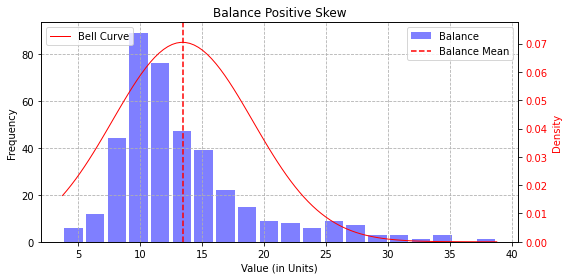

In [62]:
fig, ax1 = plt.subplots(figsize=(8, 4))
ax1.hist(df['Balance'], bins=20, color='blue', alpha=0.5, rwidth=0.85, label='Balance')
plt.axvline(df['Balance'].mean(), label='Balance Mean', ls='--', color='red')
plt.xlabel('Value (in Units)')
plt.ylabel('Frequency')
plt.grid(True, ls='--')
plt.legend()

ax1.set_title('Balance Positive Skew')
ax2 = ax1.twinx()
ax2.plot(x_balance, pdf_balance, 'r-', lw=1, label='Bell Curve')
ax2.set_ylabel('Density', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.set_ylim(0, max(pdf_balance) * 1.1)
ax2.legend(loc='upper left')
plt.tight_layout()
plt.show()

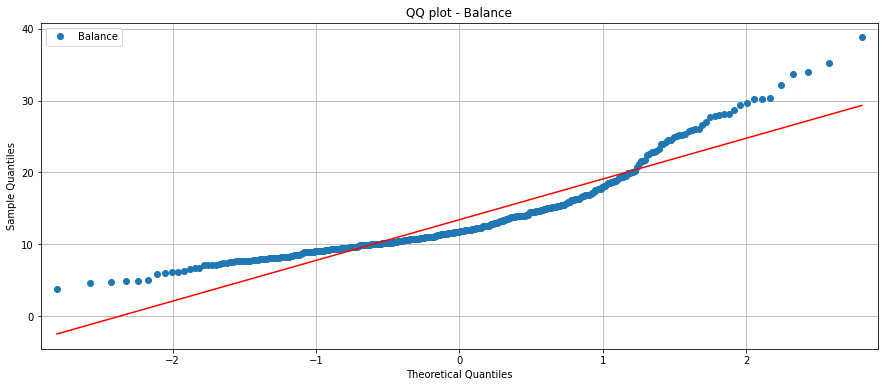

In [63]:
fig, ax = plt.subplots(figsize=(15, 6))
sm.qqplot(df['Balance'], line='s', ax=ax, label='Balance')
plt.title('QQ plot - Balance')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.grid(True)
plt.legend()
plt.show()

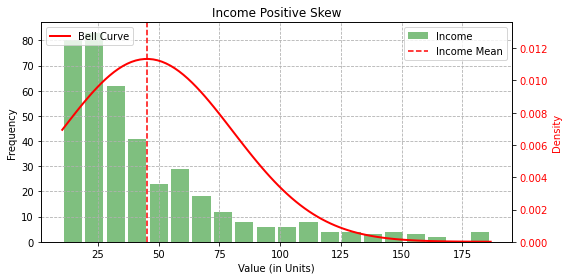

In [64]:
fig, ax1 = plt.subplots(figsize=(8, 4))
ax1.hist(df['Income'], bins=20, color='green', alpha=0.5, rwidth=0.85, label='Income')
plt.axvline(df['Income'].mean(), label='Income Mean', ls='--', color='red')
plt.xlabel('Value (in Units)')
plt.ylabel('Frequency')
plt.grid(True, ls='--')
plt.legend()
ax1.set_title('Income Positive Skew')
ax2 = ax1.twinx()

ax2.plot(x_income, pdf_income, 'r-', lw=2, label='Bell Curve')
ax2.set_ylabel('Density', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.set_ylim(0, max(pdf_income) * 1.2)
ax2.legend(loc='upper left')
plt.tight_layout()
plt.show()

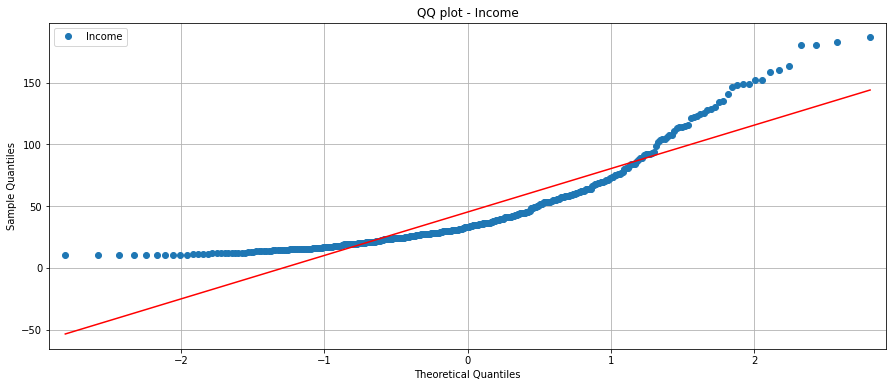

In [65]:
fig, ax = plt.subplots(figsize=(15, 6))
sm.qqplot(df['Income'], line='s', ax=ax, label='Income')
plt.title('QQ plot - Income')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.grid(True)
plt.legend()
plt.show()

This means that there are some data points that are far from the average, but they don't occur very often. In a right-skewed distribution, you'll see a long tail on the right side because the values on that side are stretched out, making the distribution lean to the right.

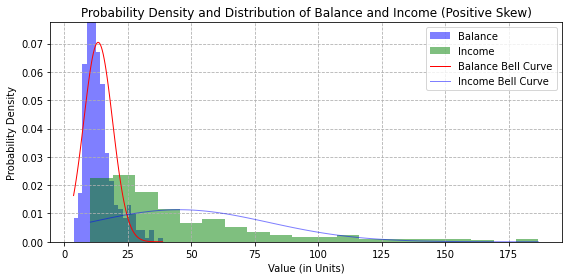

In [67]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.hist(df['Balance'], bins=20, color='blue', alpha=0.5, label='Balance', density=True)
ax.hist(df['Income'], bins=20, color='green', alpha=0.5, label='Income', density=True)

ax.plot(x_balance, pdf_balance, 'r-', lw=1, label='Balance Bell Curve')
ax.plot(x_income, pdf_income, 'b-', lw=1, label='Income Bell Curve', alpha=0.5)

ax.set_xlabel('Value (in Units)')
ax.set_ylabel('Probability Density')
ax.set_title('Probability Density and Distribution of Balance and Income (Positive Skew)')
plt.grid(True, ls='--')
ax.legend()
ax.set_ylim(0, max(max(pdf_balance), max(pdf_income)) * 1.1)
plt.tight_layout()
plt.show()

In [68]:
def identify_outliers(df, column_name):
    # Calculate the quartiles (Q1 and Q3)
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)

    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers in the specified column
    #Identify outliers as the data points that fall below the lower bound or above the upper bound in the specified column.
    outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]
    return outliers

In [69]:
outliers_balance = identify_outliers(df, 'Balance')
print("Outliers in 'Balance' data:")
print(outliers_balance)

Outliers in 'Balance' data:
       Balance   Income  Limit  Rating  Cards  Age  Education  Gender Student  \
1    23.283334  106.025   6645     483      3   82         15  Female     Yes   
3    27.652811  148.924   9504     681      3   36         11  Female      No   
28   35.271011  186.634  13414     949      2   41         14  Female      No   
32   26.039416  134.181   7838     563      2   48         13  Female      No   
41   25.291008  113.659   7659     538      2   66         15    Male     Yes   
85   29.370645  152.298  12066     828      4   41         12  Female      No   
102  24.484453   68.713   7582     531      2   56         16    Male     Yes   
103  29.707090  146.183   9540     682      6   66         15    Male      No   
121  30.261986  148.080   8157     599      2   83         13    Male      No   
128  26.032985  123.299   8376     610      2   89         17    Male     Yes   
139  25.034753  107.841  10384     728      3   87          7    Male      No   


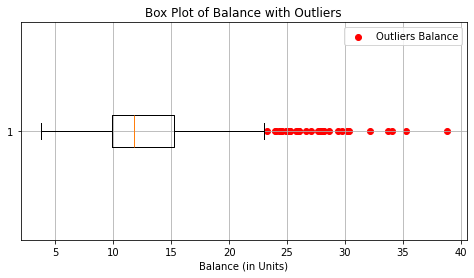

In [70]:
plt.figure(figsize=(8, 4))
plt.boxplot(df['Balance'], vert=False, showfliers=False)  # Box plot without outliers
plt.scatter(outliers_balance['Balance'], [1] * len(outliers_balance), color='red', label='Outliers Balance', marker='o')
plt.title('Box Plot of Balance with Outliers')
plt.xlabel('Balance (in Units)')
plt.legend()
plt.grid(True)
plt.show()

In [71]:
outliers_income = identify_outliers(df, 'Income')
print("Outliers in 'Income' data:")
print(outliers_income)

Outliers in 'Income' data:
       Balance   Income  Limit  Rating  Cards  Age  Education  Gender Student  \
3    27.652811  148.924   9504     681      3   36         11  Female      No   
28   35.271011  186.634  13414     949      2   41         14  Female      No   
32   26.039416  134.181   7838     563      2   48         13  Female      No   
41   25.291008  113.659   7659     538      2   66         15    Male     Yes   
66   22.781028  113.829   9704     694      4   38         13  Female      No   
85   29.370645  152.298  12066     828      4   41         12  Female      No   
103  29.707090  146.183   9540     682      6   66         15    Male      No   
121  30.261986  148.080   8157     599      2   83         13    Male      No   
128  26.032985  123.299   8376     610      2   89         17    Male     Yes   
174  26.634735  121.834  10673     750      3   54         16    Male      No   
184  27.976421  158.889  11589     805      1   62         17  Female      No   
1

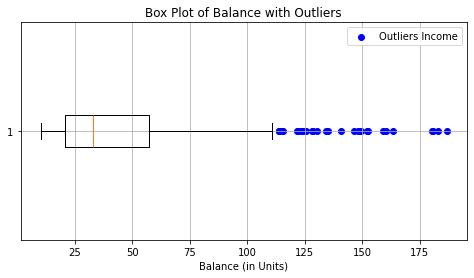

In [72]:
plt.figure(figsize=(8, 4))
plt.boxplot(df['Income'], vert=False, showfliers=False)  # Box plot without outliers
plt.scatter(outliers_income['Income'], [1] * len(outliers_income), color='blue', label='Outliers Income', marker='o')
plt.title('Box Plot of Balance with Outliers')
plt.xlabel('Balance (in Units)')
plt.legend()
plt.grid(True)
plt.show()

#### Comparing Income and Balance

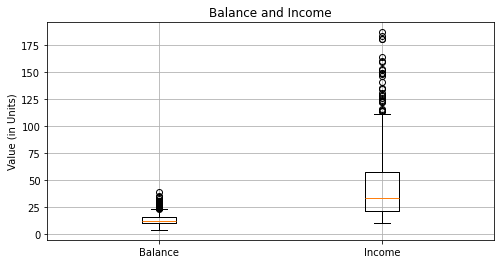

In [74]:
#box plot for Balance and Income side by side
plt.figure(figsize=(8, 4))
plt.boxplot([df['Balance'], df['Income']], labels=['Balance', 'Income'])
plt.title('Balance and Income')
plt.ylabel('Value (in Units)')
plt.grid(True)
plt.show()

We can see above, how outliers are distributed in Balance & Income. 

#### Card Limit Skewness

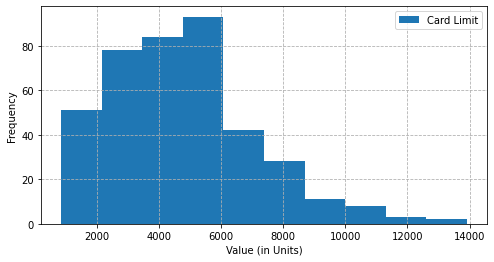

In [77]:
plt.figure(figsize=(8, 4))
plt.hist(df['Limit'], label='Card Limit')
plt.xlabel('Value (in Units)')
plt.ylabel('Frequency')
plt.grid(True, ls='--')
plt.legend()
plt.show()

In [78]:
#calculating probability distribution functions (PDF) of a normal distribution.
#Card limit
mu_limit, sigma_limit = norm.fit(df['Limit'])
x_limit = np.linspace(min(df['Limit']), max(df['Limit']), 100)
pdf_limit = stats.norm.pdf(x_balance, mu_balance, sigma_balance)

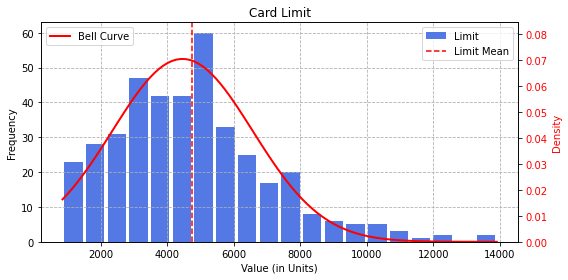

In [79]:
fig, ax1 = plt.subplots(figsize=(8, 4))
ax1.hist(df['Limit'], bins=20, color='royalblue', alpha=0.9, rwidth=0.85, label='Limit')
plt.axvline(df['Limit'].mean(), label='Limit Mean', ls='--', color='red')
plt.xlabel('Value (in Units)')
plt.ylabel('Frequency')
plt.grid(True, ls='--')
plt.legend()
ax1.set_title('Card Limit')
ax2 = ax1.twinx()

ax2.plot(x_limit, pdf_limit, 'r-', lw=2, label='Bell Curve')
ax2.set_ylabel('Density', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.set_ylim(0, max(pdf_limit) * 1.2)
ax2.legend(loc='upper left')
plt.tight_layout()
plt.show()

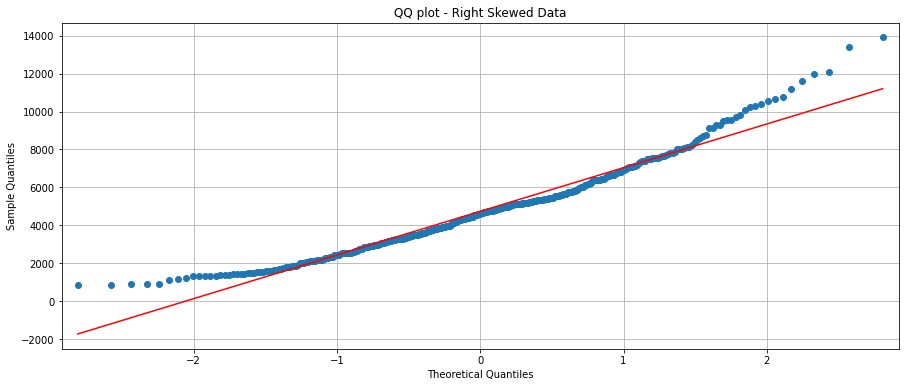

In [80]:
fig, ax = plt.subplots(figsize=(15, 6))
sm.qqplot(df['Limit'], line='s', ax=ax)
plt.title('QQ plot - Right Skewed Data')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.grid(True)
plt.show()

In [81]:
skewness_calculator = BalanceSkewness(df, 'Limit')
skewness_calculator.analyse_skewness()

Mean:  4735.6
Median:  4622.5
Mode:  855
Interpretation of skewness: No skew (symmetric distribution)
Pearson Skewness : 0.14699773390891063


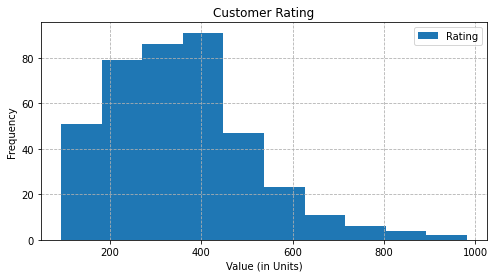

In [82]:
plt.figure(figsize=(8, 4))
plt.hist(df['Rating'], label='Rating')
plt.xlabel('Value (in Units)')
plt.ylabel('Frequency')
plt.title('Customer Rating')
plt.grid(True, ls='--')
plt.legend()
plt.show()

In [83]:
#calculating probability distribution functions (PDF) of a normal distribution.
#Card limit
mu_rating, sigma_rating = norm.fit(df['Rating'])
x_rating = np.linspace(min(df['Rating']), max(df['Rating']), 100)
pdf_rating = stats.norm.pdf(x_rating, mu_rating, sigma_rating)

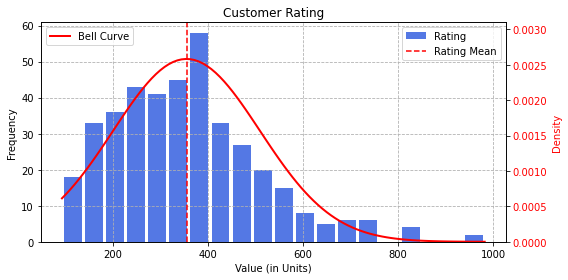

In [84]:
fig, ax1 = plt.subplots(figsize=(8, 4))
ax1.hist(df['Rating'], bins=20, color='royalblue', alpha=0.9, rwidth=0.85, label='Rating')
plt.axvline(df['Rating'].mean(), label='Rating Mean', ls='--', color='red')
plt.xlabel('Value (in Units)')
plt.ylabel('Frequency')
plt.grid(True, ls='--')
plt.legend()
ax1.set_title('Customer Rating')
ax2 = ax1.twinx()

ax2.plot(x_rating, pdf_rating, 'r-', lw=2, label='Bell Curve')
ax2.set_ylabel('Density', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.set_ylim(0, max(pdf_rating) * 1.2)
ax2.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [85]:
skewness_calculator = BalanceSkewness(df, 'Rating')
skewness_calculator.analyse_skewness()

Mean:  354.94
Median:  344.0
Mode:  344
Interpretation of skewness: No skew (symmetric distribution)
Pearson Skewness : 0.21211944981720118


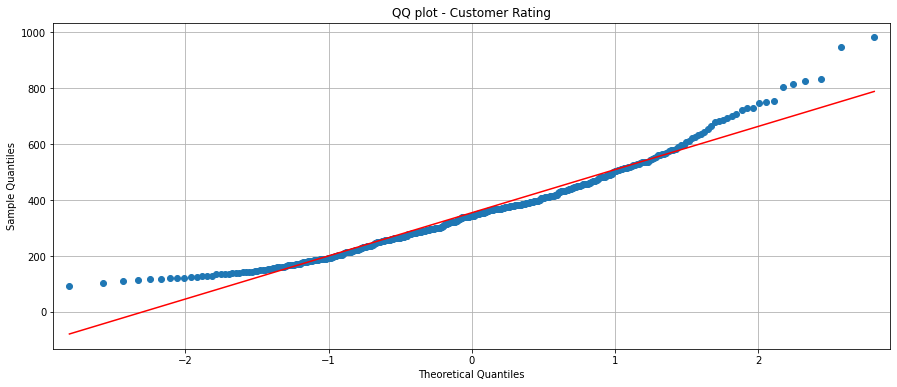

In [86]:
fig, ax = plt.subplots(figsize=(15, 6))
sm.qqplot(df['Rating'], line='s', ax=ax)
plt.title('QQ plot - Customer Rating')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.grid(True)
plt.show()

### STEP 4 : SELECTING REGRESSION MODEL

#### <font color='blue'> Correlation Analysis Between Income & Balance.

#### Now, we are going to use a Linear Regression model to train, test, and fit. Then, we will predict the point of interest


1. Data Splitting: Divide the dataset into a training set and a testing set.

2. Model Training: Train the Linear Regression model using the training set to learn the underlying patterns in the data.

3. Model Testing: Evaluate the model's performance using the testing set to assess its predictive accuracy.

4. Model Fitting: Fine-tune the model if necessary, based on testing results, by adjusting parameters or features.

5. Prediction: Use the trained model to make predictions on new or unseen data, achieving your desirable outcomes.

In [90]:
#Training model
LinearModel = LinearRegression()

In [91]:
df[:10]

,Balance,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity
0,12.240798,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian
1,23.283334,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian
2,22.530409,104.593,7075,514,4,71,11,Male,No,No,Asian
3,27.652811,148.924,9504,681,3,36,11,Female,No,No,Asian
4,16.893978,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian
5,22.486178,80.180,8047,569,4,77,10,Male,No,No,Caucasian
6,10.574516,20.996,3388,259,2,37,12,Female,No,No,African American
7,14.576204,71.408,7114,512,2,87,9,Male,No,No,Asian
8,7.938090,15.125,3300,266,5,66,13,Female,No,No,Caucasian
9,17.756965,71.061,6819,491,3,41,19,Female,Yes,Yes,African American


In [92]:
#Selectinf Indepedent and Dependent Variaible 
X_balance, y_income = df['Balance'].values.reshape(-1,1), df['Income'].values

In [93]:
#dividing data into two, 80 percent for training set and 20 percent for test set
X_train_balance, X_test_balance, y_train_income, y_test_income = train_test_split(X_balance, y_income, train_size=0.8, test_size=0.2)

In [94]:
#Checking the shape of 80 percent data in training set
print(X_train_balance.shape)
print(y_train_income.shape)

(320, 1)
(320,)


In [95]:
#checking the shape of 20 percent data in test set
print(X_test_balance.shape)
print(y_test_income.shape)

(80, 1)
(80,)


In [96]:
#Fitting train set in linear regrssion model
LinearModel.fit(X_train_balance, y_train_income)

LinearRegression()

In [97]:
#predicting best fit line
y_pred_income = LinearModel.predict(X_test_balance)

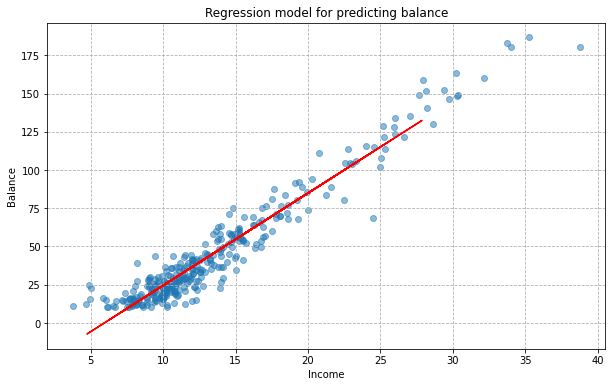

In [98]:
#plotting scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(X_train_balance, y_train_income,alpha=0.5)
plt.plot(X_test_balance, y_pred_income, color='red')
plt.xlabel('Income')
plt.ylabel('Balance')
plt.title('Regression model for predicting balance')
plt.grid(True, ls='--')
plt.show()

### Correlation Analysis 

### Pearson Correlation Coefficient (r)

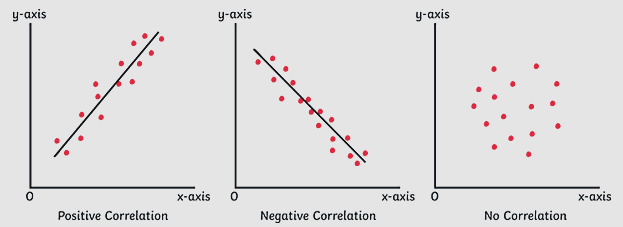

#### The Pearson coefficient, also known as Pearson's correlation coefficient or Pearson's r, is a statistical measure used to quantify the strength and direction of the linear relationship between two continuous variables. 
It ranges from -1 to 1, where:

A value of 1 indicates a perfect positive linear relationship, meaning that as one variable increases, the other also increases proportionally.

A value of -1 indicates a perfect negative linear relationship, meaning that as one variable increases, the other decreases proportionally.

A value of 0 suggests no linear relationship between the variables.

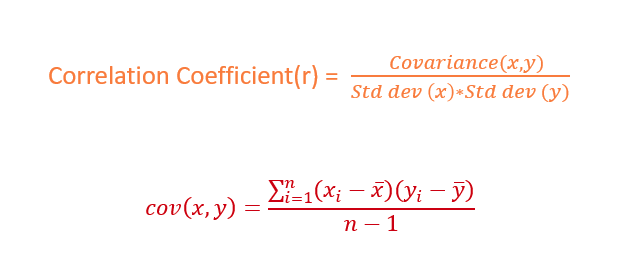

In [104]:
# covariance between 'Balance' and 'Income'
covariance = ((df['Balance'] - df['Balance'].mean()) * (df['Income'] - df['Income'].mean())).sum() / (len(df['Income']) - 1)

In [105]:
#standard deviations of 'Balance' and 'Income'
std_dev_balance = df['Balance'].std()
std_dev_income = df['Income'].std()

In [106]:
#Pearson's correlation coefficient
pearson_correlation = covariance / (std_dev_balance * std_dev_income)

print("Pearson Correlation Coefficient:", round(pearson_correlation,2))

Pearson Correlation Coefficient: 9.7e-01


### Spearman Rank Correlation 

The Spearman rank coefficient, also known as Spearman's rank correlation coefficient or Spearman's rho (ρ), is a non-parametric measure of the strength and direction of the monotonic relationship between two variables. Unlike Pearson's correlation coefficient, which measures linear relationships, Spearman's rank coefficient is based on the ranks of the data values rather than their actual values

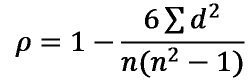

#### ρ = 1 - [(6 * Σ(d^2)) / (n * (n^2 - 1))]

#### Σ(d^2) is the sum of the squared rank differences and n is the number of data points.

Spearman's rank coefficient ranges from -1 to 1, similar to Pearson's correlation coefficient:

A value of 1 indicates a perfect monotonic positive relationship, meaning that as one variable increases, the other also increases monotonically.

A value of -1 indicates a perfect monotonic negative relationship, meaning that as one variable increases, the other decreases monotonically.

A value of 0 suggests no monotonic relationship between the variables.

In [113]:
# Rank the data in both columns
df['Rank_Balance'] = df['Balance'].rank()
df['Rank_Income'] = df['Income'].rank()

In [114]:
#the differences between the ranks
df['Rank_Difference'] = df['Rank_Balance'] - df['Rank_Income']

In [115]:
# Square the rank differences
df['Rank_Difference_Squared'] = df['Rank_Difference'] ** 2

In [116]:
#sum of squared rank differences
sum_squared_rank_diff = df['Rank_Difference_Squared'].sum()

#the number of data points
n = len(df)

In [117]:
#formula to compute Spearman's rank correlation coefficient
spearman_correlation = 1 - ((6 * sum_squared_rank_diff) / (n * (n**2 - 1)))

print("Spearman Rank Correlation (Manually):", round(spearman_correlation,2))

Spearman Rank Correlation (Manually): 0.92


In [118]:
from scipy.stats import spearmanr

In [119]:
# Spearman rank correlation
spearman_corr, _ = spearmanr(df['Balance'], df['Income'])

print("Spearman Rank Correlation:", round(spearman_corr,2))

Spearman Rank Correlation: 0.92


### Coefficient & Intercept 

## Y = β0 + β1 * X

Y is the predicted value of the dependent variable.

X is the value of the independent variable.

β0 is the intercept.

β1 is the coefficient (slope).

#### Coefficient (Slope)

#### If β1 is positive, it indicates a positive relationship between X and Y. That is, as X increases, Y is expected to increase.

#### If β1 is negative, it indicates a negative relationship between X and Y. As X increases, Y is expected to decrease.

#### The magnitude of β1 quantifies the strength of the relationship. A larger absolute value of β1 implies a stronger relationship between the variables.

In [125]:
#manual data points are values of X
#manual prediction is y
manual_data_points = np.array([0, 10, 20]).reshape(-1,1)
manual_prediction = LinearModel.predict(manual_data_points)
manual_prediction

array([-35.80280638,  24.5373401 ,  84.87748658])

#### For example:

If X = 10, then Y ≈ -35.1304 + 6.0036 * 10 ≈ 24.9056

If X = 0, then Y ≈ -35.1304 (the intercept)

In [127]:
print("Number of coefficients:", len(LinearModel.coef_))

print("Estimated coefficients: {}".format(LinearModel.coef_))

Number of coefficients: 1
Estimated coefficients: [6.03401465]


#### Intercept (Y-Intercept)

In [129]:
print("Estimated intercept: {}".format(LinearModel.intercept_))

Estimated intercept: -35.80280638489604


The estimated intercept, -35, is the predicted value of Y when X is set to zero, and the estimated coefficient, 5.9 represents the slope or rate of change in Y for a one-unit change in X.

### R SQUARE SCORE

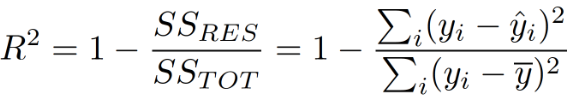

In [133]:
#R Square
r_square = r2_score(y_test_income, y_pred_income)
print(f'R Square: {r_square:.2f}')

R Square: 0.93


### COST FUNCTION

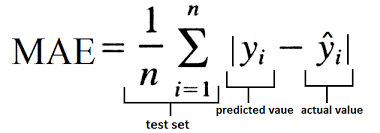

In [136]:
#Mean absolute error
mae = mean_absolute_error(y_test_income, y_pred_income)
print(f'Mean Absolute Error: {mae:.2f}')

Mean Absolute Error: 5.77


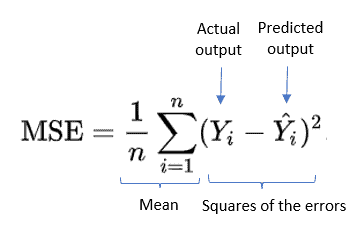

In [138]:
#mean square error
mse = mean_squared_error(y_test_income, y_pred_income)
print(f'Mean Square Error: {mse:.2f}')

Mean Square Error: 56.94


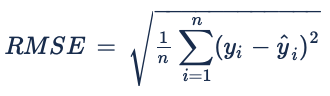

In [140]:
#Root mean square error
rmse = mt.sqrt(mean_squared_error(y_test_income, y_pred_income))
print(f'Root Mean Square Error: {rmse:.2f}')

Root Mean Square Error: 7.55


#### Cross Validation 

#### Average 5-fold cross-validation scores

In [143]:
# Compute 5-fold cross-validation scores: cv_scores
cv_scores_five_fold = cross_val_score(LinearModel, X_balance, y_income, cv=5, scoring='r2')

In [144]:
# The R-squared scores for each fold
for i, r2 in enumerate(cv_scores_five_fold, 1):
    print(f"Fold {i} R-squared Score: {r2:.4f}")

Fold 1 R-squared Score: 0.9249
Fold 2 R-squared Score: 0.8983
Fold 3 R-squared Score: 0.9242
Fold 4 R-squared Score: 0.9395
Fold 5 R-squared Score: 0.9553


In [145]:
print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores_five_fold).round(2)))

Average 5-Fold CV Score: 0.93


#### Perform cross-validation using KFold

In [147]:
# KFold object with 5 folds
kf = KFold(n_splits=5, shuffle=True, random_state=0)

In [148]:
# Perform cross-validation
scores = cross_val_score(LinearModel, X_balance, y_income, cv=kf, scoring='r2') 

In [149]:
for i, r2 in enumerate(scores, 1):
    print(f"Scores {i} R Squared: {r2:.4f}")

Scores 1 R Squared: 0.9004
Scores 2 R Squared: 0.9436
Scores 3 R Squared: 0.9050
Scores 4 R Squared: 0.9196
Scores 5 R Squared: 0.9592


In [150]:
print("Average R square: {}".format(np.mean(scores).round(2)))

Average R square: 0.93


#### Evaluating Train & Test Performance 

In [152]:
# Evaluating training set performance
print("Training set score: {:.2}".format(LinearModel.score(X_train_balance, y_train_income)))
# Evaluating test set performance
print("Test set score: {:.2}".format(LinearModel.score(X_test_balance, y_test_income)))

Training set score: 0.93
Test set score: 0.93


### Gradient Descent (Optimisation) -  Income & Balance

In [154]:
#Declaring Independent 'X' and dependent variables 'y'
X = df['Balance'].values.reshape(-1,1)
y = df['Income'].values

In [155]:
#Spilitng data into train and test size 
X_train_balance, X_test_balance, y_train_income, y_test_income = train_test_split(X, y, 
                                                                                  train_size=0.8, test_size=0.2)

In [156]:
#list to hold the data as tuples (X, y)
data = list(zip(X_train_balance, y_train_income))

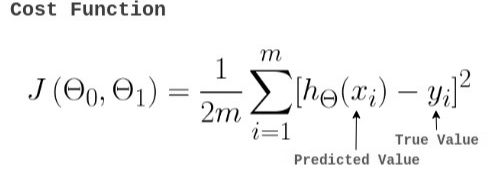

In [158]:
# Initial value for the slope of a linear model
m = 0.5

# Initial value for the y-intercept of a linear model
b = 0.5

# Learning rate determines the step size for updating model parameters during optimization
learning_rate = 0.001

# Number of iterations or epochs for the optimization process
iterations = 10000

# Lists to store iteration numbers and mean squared error (MSE) values during optimization
iteration_list = []
mse_list = []

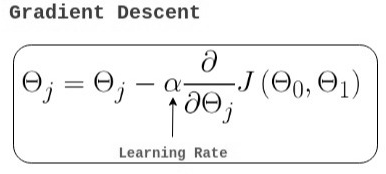

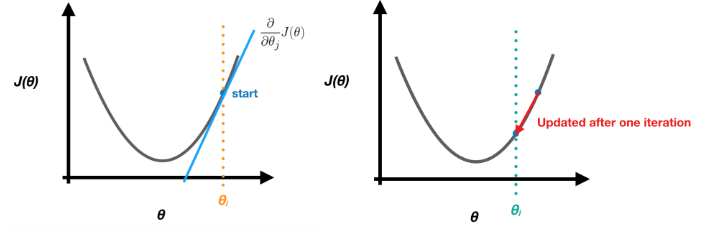

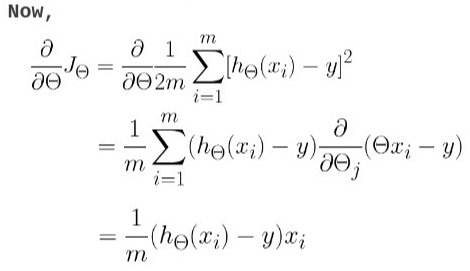

In [162]:
# Gradient Descent
for iteration in range(iterations):
    # predicted values
    y_pred = [m * xi + b for xi, _ in data]

    # MSE
    mse = sum([(yi - ypi)**2 for (_, yi), ypi in zip(data, y_pred)]) / len(data)

    # derivatives
    dm = (-2/len(data)) * sum([xi * (yi - ypi) for (xi, yi), ypi in zip(data, y_pred)])
    db = (-2/len(data)) * sum([yi - ypi for (_, yi), ypi in zip(data, y_pred)])

    # Update m and b with a decaying learning rate
    m_new = m - learning_rate * dm
    b_new = b - learning_rate * db

    # Append values to lists
    iteration_list.append(iteration)
    mse_list.append(mse)

    # Update m and b for the next iteration
    m = m_new
    b = b_new

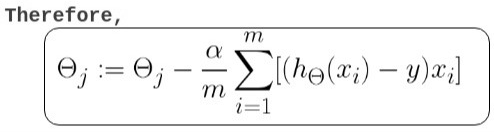

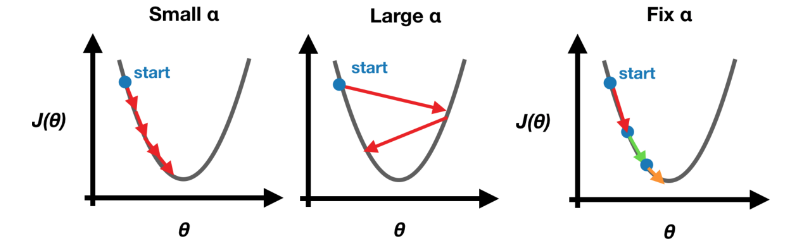

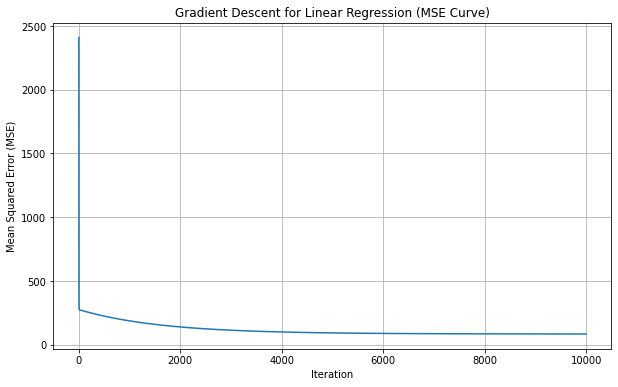

In [165]:
plt.figure(figsize=(10, 6))
plt.plot(iteration_list, mse_list)
plt.xlabel('Iteration')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Gradient Descent for Linear Regression (MSE Curve)')
plt.grid(True)

In [166]:
#prediction of y with train dataset
y_pred_train = [m * xi + b for xi in X_train_balance]

In [167]:
r2_train = r2_score(y_train_income, y_pred_train)
print(f'Train R square: {r2_train:.2f}')

Train R square: 0.93


In [168]:
#prediction of y with test dataset
y_pred_test = [m * xi + b for xi in X_test_balance]

In [169]:
r2_test = r2_score(y_test_income, y_pred_test)
print(f'Test R square : {r2_test:.2f}')

Test R square : 0.93


### Scatter plot after opitimisation 

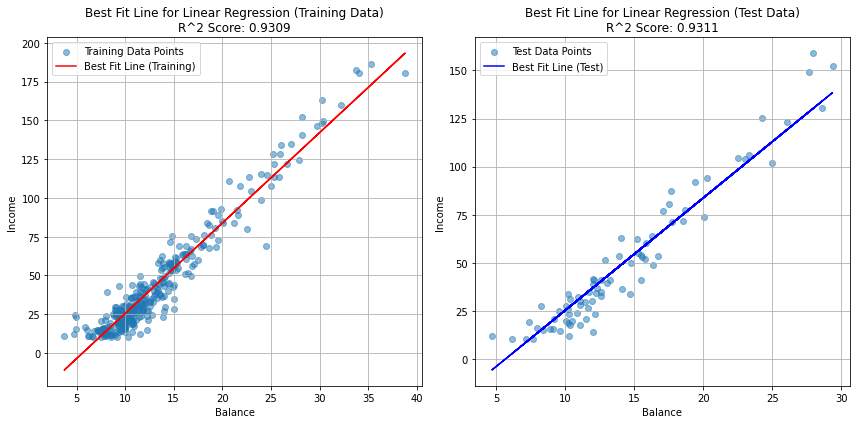

In [171]:
plt.figure(figsize=(12, 6))

#training data points and the best-fit line
plt.subplot(1, 2, 1)
plt.scatter(X_train_balance, y_train_income, label='Training Data Points', alpha=0.5)
plt.plot(X_train_balance, y_pred_train, color='red', label='Best Fit Line (Training)')
plt.xlabel('Balance')
plt.ylabel('Income')
plt.title('Best Fit Line for Linear Regression (Training Data)\nR^2 Score: {:.4f}'.format(r2_train))
plt.legend()
plt.grid(True)

#test data points and the best-fit line
plt.subplot(1, 2, 2)
plt.scatter(X_test_balance, y_test_income, label='Test Data Points', alpha=0.5)
plt.plot(X_test_balance, y_pred_test, color='blue', label='Best Fit Line (Test)')
plt.xlabel('Balance')
plt.ylabel('Income')
plt.title('Best Fit Line for Linear Regression (Test Data)\nR^2 Score: {:.4f}'.format(r2_test))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Comparing Multiple Linear Regression Model

In [173]:
#Spliting data for test and train
X_train_balance, X_test_balance, y_train_income, y_test_income = train_test_split(X_balance, y_income, train_size = 0.8, test_size=0.2)

In [174]:
#selecting various model for Linear regression
models = [
    ("LassoCV", LassoCV()),
    ("Lasso", Lasso()),
    ("Linear Regression", LinearRegression()),
    ("Ridge", Ridge()),
    ("LassoLars (with StandardScaler)", make_pipeline(StandardScaler(with_mean=False), LassoLars())),
    ("Bayesian Ridge", BayesianRidge()),
    ("ElasticNet", ElasticNet()),
    ("HuberRegressor (max_iter=1000)", HuberRegressor(max_iter=1000))
]

In [175]:
#creating empty list for storing model metrics
model_metrics = []

# for loop to train all model
for i, (j, model) in enumerate(models):
    #testing model
    model.fit(X_train_balance, y_train_income)
    #predicting y
    y_pred = model.predict(X_test_balance)

    # Evaluation metrics
    # r square
    r2 = r2_score(y_test_income, y_pred)
    #mean square error
    mse = mean_squared_error(y_test_income, y_pred)
    #root mean square error
    rmse = np.sqrt(mse)
    #mean absolute error
    mae = mean_absolute_error(y_test_income, y_pred)

    # Dictionary to store the metrics for the current model
    metrics_dict = {
        'Model Name': j,
        'R² Score': r2,
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae
    }

    # Append the metrics dictionary to the list
    model_metrics.append(metrics_dict)

In [176]:
#creating dataframe of model metrics
metrics_df = pd.DataFrame(model_metrics)
metrics_df

,Model Name,R² Score,MSE,RMSE,MAE
0,LassoCV,0.905456,99.545121,9.977230,7.426851
1,Lasso,0.905778,99.205844,9.960213,7.417201
2,Linear Regression,0.905371,99.634719,9.981719,7.429250
3,Ridge,0.905379,99.626123,9.981289,7.429022
4,LassoLars (with StandardScaler),0.907025,97.892851,9.894082,7.379342
5,Bayesian Ridge,0.905389,99.615744,9.980769,7.428747
6,ElasticNet,0.906569,98.372736,9.918303,7.392817
7,HuberRegressor (max_iter=1000),0.904318,100.743362,10.037099,7.456448


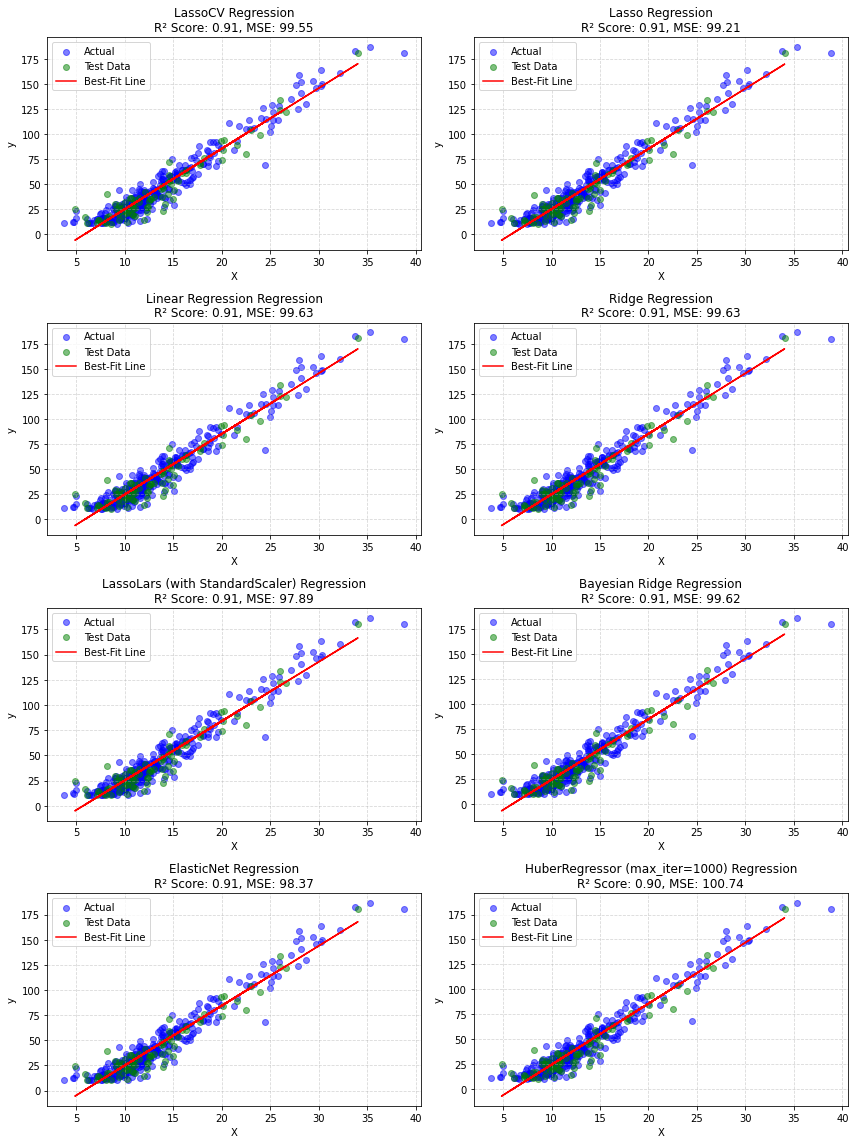

In [177]:
#number of columns and rows
n_rows = 4
n_cols = 2

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 16))
#flatten the axes to loop through them
axes = axes.flatten()

#for loop to train model
for i, (model_name, model) in enumerate(models):
    #training model
    model.fit(X_train_balance, y_train_income)
    #prediction of best fit line
    y_pred = model.predict(X_test_balance)
    #calculating r square
    r2 = r2_score(y_test_income, y_pred)
    #calculating mean square error
    mse = mean_squared_error(y_test_income, y_pred)
    
    #scatter plot of train dataset
    axes[i].scatter(X_train_balance, y_train_income, c='b', label='Actual', alpha=0.5)
    #scatter plot of test dataset
    axes[i].scatter(X_test_balance, y_test_income, c='g', label='Test Data', alpha=0.5)
    #predicting best fit line
    axes[i].plot(X_test_balance, y_pred, c='r', label='Best-Fit Line')
    axes[i].set_xlabel('X')
    axes[i].set_ylabel('y')
    axes[i].set_title(f"{model_name} Regression\nR² Score: {r2:.2f}, MSE: {mse:.2f}")
    axes[i].grid(True, ls='--', alpha=0.5)
    axes[i].legend()

# Remove empty subplots
for j in range(len(models), n_rows * n_cols):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

In [178]:
# Define the gradient_descent function with m and b initialized to 0.5
def gradient_descent(X, y, learning_rate, num_iterations):
    # Dimensions of the input data matrix X.
    m, n = X.shape

    # Initialize the parameter vector theta with 0.5 for m and b.
    theta = np.array([0.5, 0.5])

    # Create an empty list to store the cost function history.
    cost_history = []

    # Perform gradient descent for the specified number of iterations.
    for iteration in range(num_iterations):
        # Predict values using the current parameter vector theta.
        y_pred = X.dot(theta)
        # Error between the predictions and actual target values.
        error = y_pred - y
        # Gradient of the cost function with respect to theta.
        gradient = (1 / m) * X.T.dot(error)
        # Update the parameter vector theta using the learning rate and gradient.
        theta -= learning_rate * gradient
        # The cost function (mean squared error) and store it.
        cost = (1 / (2 * m)) * np.sum(error ** 2)
        cost_history.append(cost)
    #returning theta and cost function data
    return theta, cost_history

In [179]:
#selecting various model for Linear regression
models = [
    ("LassoCV", LassoCV()),
    ("Lasso", Lasso()),
    ("Linear Regression", LinearRegression()),
    ("Ridge", Ridge()),
    ("LassoLars", LassoLars()),
    ("Bayesian Ridge", BayesianRidge()),
    ("ElasticNet", ElasticNet()),
    ("HuberRegressor (max_iter=1000)", HuberRegressor(max_iter=1000)),
]

### Standardization

The goal of standardization is to make different variables or features comparable by removing the effects of differences in scale, units, or measurement.

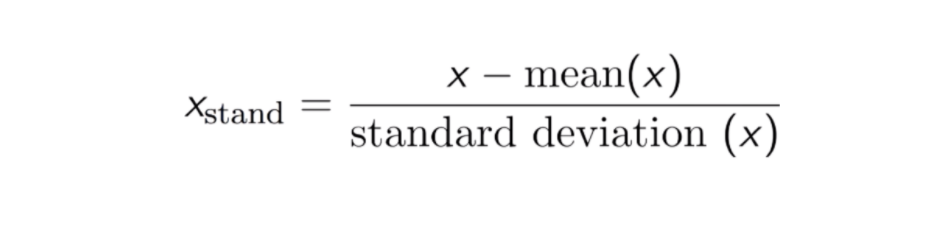!

In [183]:
#standardization of Independent variables
x = df['Balance']
X = (X - X.mean())/X.std()
X = X.reshape(-1, 1)

In [184]:
#standardization of dependent variable
y = df['Income']
y = (y - y.mean())/y.std()

In [185]:
#80 percent train and 20 percent test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, test_size = 0.2)

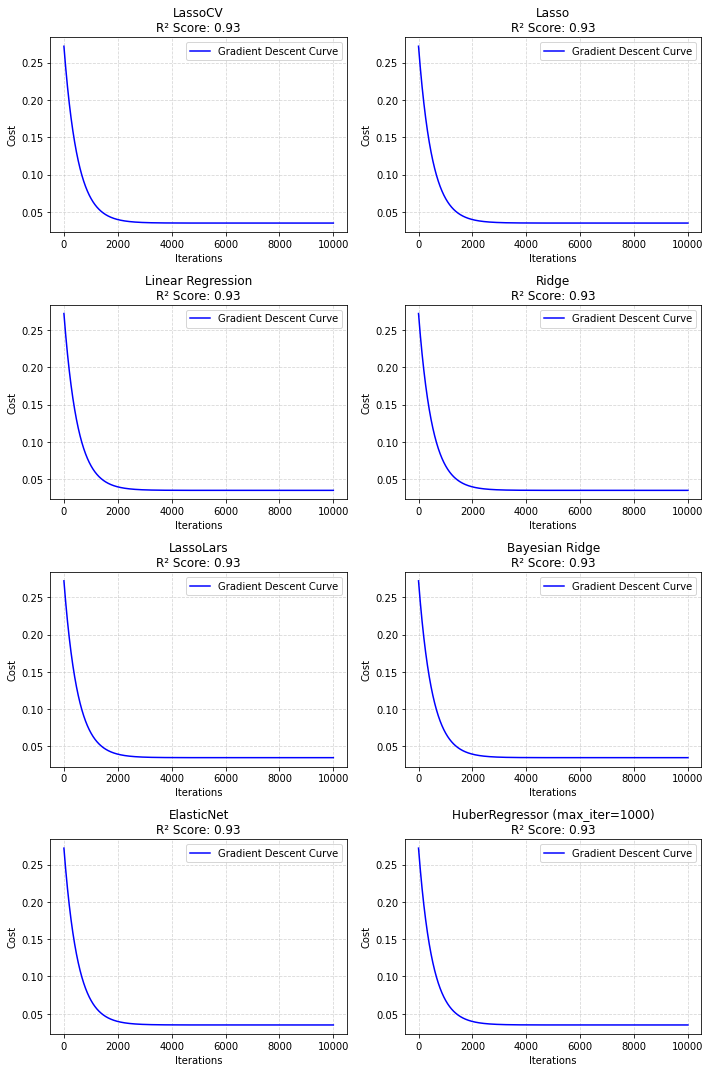

In [186]:
# Create subplots for each model
#number of rows
num_rows = 4
#number of columns
num_cols = 2
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 15))
axes = axes.flatten()

# for loop to Train and evaluate each model
for i, (model_name, model) in enumerate(models):
    # Reset the initial values of theta for each model
    theta = np.array([0.5, 0.5])

    # Train the model using gradient descent
    X_train_gd = np.c_[np.ones((X_train.shape[0], 1)), X_train]
    theta_gd, cost_history = gradient_descent(X_train_gd, y_train, learning_rate=0.001, num_iterations=10000)

    # Make predictions on the test set
    X_test_gd = np.c_[np.ones((X_test.shape[0], 1)), X_test]
    y_pred = X_test_gd.dot(theta_gd)

    # Calculate R-squared (R²) and Mean Squared Error (MSE) for evaluation
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    # Plot the cost history (gradient descent curve)
    ax = axes[i]
    ax.plot(range(len(cost_history)), cost_history, label='Gradient Descent Curve', c='b')
    ax.set_xlabel('Iterations')
    ax.set_ylabel('Cost')
    ax.set_title(f"{model_name}\nR² Score: {round(r2,2)}")
    ax.grid(True, ls='--', alpha=0.5)
    ax.legend()

plt.tight_layout()
plt.show()

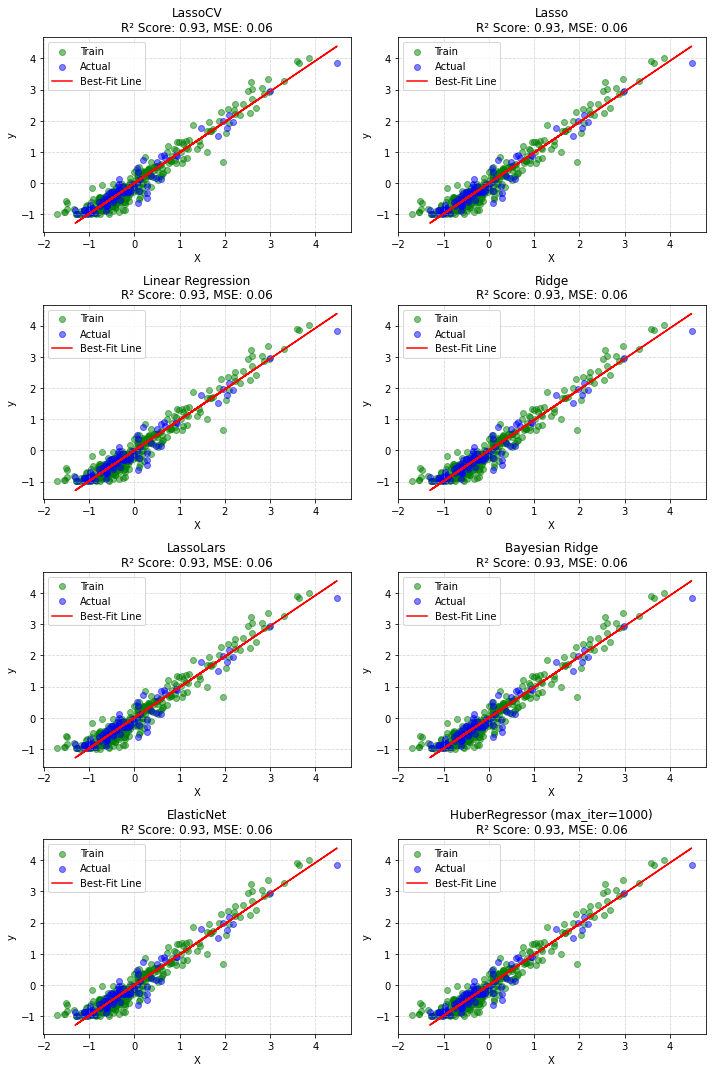

In [187]:
#number of rows
num_rows = 4
#number of columns
num_cols = 2
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 15))
axes = axes.flatten()

# for loop to Train and evaluate each model
for i, (model_name, model) in enumerate(models):
    # Reset the initial values of theta for each model
    theta = np.array([0.5, 0.5])
    
    # Add a column of ones to the feature matrix X_train to represent the bias term
    X_train_gd = np.c_[np.ones((X_train.shape[0], 1)), X_train]

    # Perform gradient descent optimization to find model parameters theta and cost history
    # - X_train_gd: The augmented feature matrix with a column of ones
    # - y_train: The target variable (labels)
    # - learning_rate: The step size for parameter updates during optimization
    # - num_iterations: The number of iterations or epochs for the optimization process
    theta_gd, cost_history = gradient_descent(X_train_gd, y_train, learning_rate=0.001, num_iterations=10000)

    # Prepare the test data for prediction:
    # - Add a column of ones to the feature matrix X_test to account for the bias term
    X_test_gd = np.c_[np.ones((X_test.shape[0], 1)), X_test]

    # Use the learned coefficients (theta_gd) to make predictions on the test set:
    # - Perform matrix multiplication between the augmented feature matrix X_test_gd
    #   and the learned coefficients theta_gd to obtain the predicted values.
    y_pred = X_test_gd.dot(theta_gd)

    # R-squared (R²) 
    r2 = r2_score(y_test, y_pred)
    # Mean Squared Error (MSE)
    mse = mean_squared_error(y_test, y_pred)

    ax = axes[i]
    #scatter plot for train data
    ax.scatter(X_train, y_train, c='g', label='Train', alpha=0.5)
    #scatter plot for test data
    ax.scatter(X_test, y_test, c='b', label='Actual', alpha=0.5)
    #plotting best fit line
    ax.plot(X_test, y_pred, c='r', label='Best-Fit Line')
    ax.set_xlabel('X')
    ax.set_ylabel('y')
    ax.set_title(f"{model_name}\nR² Score: {r2:.2f}, MSE: {mse:.2f}")
    ax.grid(True, ls='--', alpha=0.5)
    ax.legend()

# Hide any empty subplots
for j in range(i + 1, num_rows * num_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Limit & Rating

In [189]:
#Selecting Dependent and Independent variables 
X_rating, y_limit = df['Rating'].values.reshape(-1,1), df['Limit'].values

In [190]:
#Spliting data for training and test
X_train_rating,X_test_rating,y_train_limit, y_test_limit = train_test_split(X_rating, y_limit, train_size = 0.8, test_size=0.1)

In [191]:
#Checking shape of train data
print(X_train_rating.shape)
print(y_train_limit.shape)

(320, 1)
(320,)


In [192]:
#checking shape of test data
print(X_test_rating.shape)
print(y_test_limit.shape)

(40, 1)
(40,)


In [193]:
#Training & Testing Linear Regression model
LinearModel.fit(X_train_rating, y_train_limit)

LinearRegression()

In [194]:
#prediction
y_pred_limit = LinearModel.predict(X_test_rating)

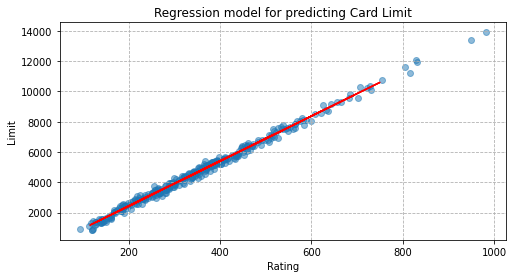

In [195]:
#scatter plot of rating and limit dataset
#plotting best fit line for predcition 
plt.figure(figsize=(8, 4))
plt.scatter(X_train_rating, y_train_limit,alpha=0.5)
plt.plot(X_test_rating, y_pred_limit, color='red')
plt.xlabel('Rating')
plt.ylabel('Limit')
plt.title('Regression model for predicting Card Limit')
plt.grid(True, ls='--')
plt.show()

#### R Score 

In [197]:
#R Square
print(f'R Square: {r2_score(y_test_limit, y_pred_limit)}')

R Square: 0.9943091187293016


#### Cost Function 

In [199]:
#Mean absolute error
print(f'Mean Absolute Error: {mean_absolute_error(y_test_limit, y_pred_limit)}')

Mean Absolute Error: 147.49456595773583


In [200]:
#mean square error
print(f'Mean Square Error: {mean_squared_error(y_test_limit, y_pred_limit)}')

SyntaxError: f-string: expecting '}' (2820891166.py, line 2)

In [ ]:
#Root mean square error
print(f'Root Mean Square Error: {mt.sqrt(mean_squared_error(y_test_limit, y_pred_limit))}')

#### Gradient Descent (Optimisation) -  Rating & Limit

In [ ]:
#Selecting Dependent and Independent variable plus converting them to 
X = df['Rating'].values.reshape(-1,1)
y = df['Limit'].values

X = (X - X.mean())/X.std()
y = (y - y.mean())/y.std()

In [ ]:
X[:5]

In [ ]:
y[:5]

In [ ]:
X_train_rating, X_test_rating, y_train_limit, y_test_limit = train_test_split(X, y, test_size=0.2)

In [ ]:
#list to hold the data as tuples (X, y)
data = list(zip(X_train_rating, y_train_limit))

In [ ]:
m = 0.5
b = 0.5
learning_rate = 0.01
iterations = 1000
iteration_list = []
mse_list = []

In [ ]:
# Gradient Descent
for iteration in range(iterations):
    # predicted values
    y_pred = [m * xi + b for xi, _ in data]

    # MSE
    mse = sum([(yi - ypi)**2 for (_, yi), ypi in zip(data, y_pred)]) / len(data)

    # derivatives
    dm = (-2/len(data)) * sum([xi * (yi - ypi) for (xi, yi), ypi in zip(data, y_pred)])
    db = (-2/len(data)) * sum([yi - ypi for (_, yi), ypi in zip(data, y_pred)])

    # Update m and b with a decaying learning rate
    m_new = m - learning_rate * dm
    b_new = b - learning_rate * db

    # Append values to lists
    iteration_list.append(iteration)
    mse_list.append(mse)

    # Update m and b for the next iteration
    m = m_new
    b = b_new

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(iteration_list, mse_list)
plt.xlabel('Iteration')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Gradient Descent for Linear Regression (MSE Curve)')
plt.grid(True)

In [ ]:
#R^2 score for training data
y_pred_train = [m * xi + b for xi in X_train_rating]

In [ ]:
r2_train = r2_score(y_train_limit, y_pred_train)
print(f'R square train: {r2_train}')

In [ ]:
#R^2 score for test data
y_pred_test = [m * xi + b for xi in X_test_rating]

In [ ]:
r2_test = r2_score(y_test_limit, y_pred_test)
print(f'R square test: {r2_test}')

In [ ]:
plt.figure(figsize=(12, 6))

#training data points and the best-fit line
plt.subplot(1, 2, 1)
plt.scatter(X_train_rating, y_train_limit, label='Training Data Points', alpha=0.5)
plt.plot(X_train_rating, y_pred_train, color='red', label='Best Fit Line (Training)')
plt.xlabel('Rating (Standard Scale)')
plt.ylabel('Limit (Standard Scale)')
plt.title('Best Fit Line for Linear Regression (Training Data)\nR^2 Score: {:.4f}'.format(r2_train))
plt.legend()
plt.grid(True)

#test data points and the best-fit line
plt.subplot(1, 2, 2)
plt.scatter(X_test_rating, y_test_limit, label='Test Data Points', alpha=0.5)
plt.plot(X_test_rating, y_pred_test, color='blue', label='Best Fit Line (Test)')
plt.xlabel('Rating (Standard Scale)')
plt.ylabel('Limit (Standard Scale)')
plt.title('Best Fit Line for Linear Regression (Test Data)\nR^2 Score: {:.4f}'.format(r2_test))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
X_mean = df['Rating'].mean()
X_std = df['Rating'].std()
y_mean = df['Limit'].mean()
y_std = df['Limit'].std()

In [ ]:
# Reverse scaling for coefficients (m and b)
m_original = m * (y_std / X_std)
b_original = (b * y_std) + y_mean - (m * X_mean * (y_std / X_std))

In [ ]:
X_original = X * X_std + X_mean
y_original = y * y_std + y_mean

In [ ]:
X_train_original = X_train_rating * X_std + X_mean
y_train_original = y_train_limit * y_std + y_mean
X_test_original = X_test_rating * X_std + X_mean
y_test_original = y_test_limit * y_std + y_mean

In [ ]:
#best prediction line on the original scale
y_pred_train_original = [m_original * xi + b_original for xi in X_train_original]
y_pred_test_original = [m_original * xi + b_original for xi in X_test_original]

In [ ]:
r2_train = r2_score(y_train_original, y_pred_train_original)
print(f'R square train: {abs(r2_train)}')

In [ ]:
r2_test = r2_score(y_test_original, y_pred_test_original)
print(f'R square test: {abs(r2_test)}')

In [ ]:
plt.figure(figsize=(12, 6))

# Training data points and the best-fit line
plt.subplot(1, 2, 1)
plt.scatter(X_train_original, y_train_original, label='Training Data Points', alpha=0.5)
plt.plot(X_train_original, y_pred_train_original, color='red', label='Best Fit Line (Training)')
plt.xlabel('Rating (Original Scale)')
plt.ylabel('Limit (Original Scale)')
plt.title('Best Fit Line for Linear Regression (Training Data)\nR^2 Score: {:.4f}'.format(r2_train))
plt.legend()
plt.grid(True)

# Test data points and the best-fit line
plt.subplot(1, 2, 2)
plt.scatter(X_test_original, y_test_original, label='Test Data Points', alpha=0.5)
plt.plot(X_test_original, y_pred_test_original, color='blue', label='Best Fit Line (Test)')
plt.xlabel('Rating (Original Scale)')
plt.ylabel('Limit (Original Scale)')
plt.title('Best Fit Line for Linear Regression (Test Data)\nR^2 Score: {:.4f}'.format(r2_test))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### STEP 5 : DATA DISCOVERY 

#### Cards & Age

In [ ]:
df[:5]

In [ ]:
df['Age'].unique()

Total number of Age count in our dataset. 

In [ ]:
age_counts = df['Age'].value_counts()
for age, count in age_counts.items():
    print(f'Age: {age}, Count: {count}')

In [ ]:
plt.figure(figsize=(15, 4))
df['Age'].value_counts(ascending=True).plot(kind='bar', alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Count')
plt.grid(True, linestyle='--', alpha=0.5)

 The most common ages in the dataset are 44 and 66, each occurring 13 times. These ages have the highest counts, making them the modes of the distribution.
 
 There is a wide range of ages in the dataset, from 23 to 98. The counts vary, with some ages occurring frequently and others less so. The counts decrease as you move away from the modes.
 
 Ages at the lower and upper ends of the distribution (e.g., 23, 98) occur only once, indicating that they are outliers or uncommon ages in the dataset.

In [ ]:
df['Cards'].unique()

In [ ]:
cards_counts = df['Cards'].value_counts()
for card, count in cards_counts.items():
    print(f'Card: {card}, Count: {count}')

In [ ]:
plt.figure(figsize=(15, 4))
df['Cards'].value_counts(ascending=True).plot(kind='bar', alpha=0.7)
plt.xlabel('Cards')
plt.ylabel('Count')
plt.title('Customer Cards Count')
plt.grid(True, linestyle='--', alpha=0.5)

1. The most frequent card values are "Card: 2" and "Card: 3," with counts of 115 and 111, respectively. 

2. These are the modes of the distribution, indicating that they occur more frequently than any other card value.

3. The counts for different card values vary widely. While "Card: 2" and "Card: 3" are highly frequent, "Card: 4" is also common but less so, with a count of 72. The counts decrease further for "Card: 1," "Card: 5," and so on.

4. "Card: 6," "Card: 7," "Card: 8," and "Card: 9" have lower counts, with just a few occurrences each. These values represent the tail ends of the distribution and are less common in the dataset.
 
5. "Card: 8" and "Card: 9" have particularly low counts (1 each), suggesting that they are outliers or extremely rare in the dataset.
 

In [ ]:
age_card_counts = df.groupby('Age')['Cards'].sum().reset_index()
max_card_age = age_card_counts[age_card_counts['Cards'] == age_card_counts['Cards'].max()]

In [ ]:
#index number
max_card_age.index

In [ ]:
print("Age with the highest card count:")
print(max_card_age)

It appears that for individuals who are 66 years old, the most common card is "Card: 39," with a count of 66. This means that among individuals who are 66 years old, "Card: 39" is the card type that occurs most frequently, appearing 66 times in the dataset. 

In [ ]:
age_card_counts = df.groupby('Age')['Cards'].sum().reset_index()
min_card_age = age_card_counts[age_card_counts['Cards'] == age_card_counts['Cards'].min()]

In [ ]:
print("Age with the lowest card count:")
print(min_card_age)

This information indicates that among these specific age groups (23, 26, 85, 89, and 91), there is a low occurrence of card types, with only 2 instances of cards for each of these ages. It can be valuable for identifying age groups where certain card types are less common in your dataset.

In [ ]:
gender_card_counts = df.groupby('Gender')['Cards'].sum().reset_index()
max_card_gender = gender_card_counts[gender_card_counts['Cards'] == gender_card_counts['Cards'].max()]
min_card_gender = gender_card_counts[gender_card_counts['Cards'] == gender_card_counts['Cards'].min()]

In [ ]:
print("Gender with the highest & Lowest card count:")
print(max_card_gender)
print(min_card_gender)

1. Gender with the Highest Card Count: The gender group "Female" has the highest card count, with a total of 606 cards associated with it. This means that "Female" is the most common gender category among cardholders in your dataset.

2. Gender with the Lowest Card Count: The gender group "Male" has the lowest card count, with only 57 cards associated with it. This indicates that "Male" is the least common gender category among cardholders in your dataset.

In [ ]:
plt.figure(figsize=(4, 4))
plt.bar(max_card_gender['Gender'], max_card_gender['Cards'], color='blue')
plt.bar(min_card_gender['Gender'], min_card_gender['Cards'], color='red')
plt.xlabel('Gender')
plt.ylabel('Card Count')
plt.title('Card Count by Gender (Highest and Lowest)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [ ]:
ethnicity_card_counts = df.groupby('Ethnicity')['Cards'].sum().reset_index()

In [ ]:
print("Card Counts by Ethnicity:")
print()
print(ethnicity_card_counts)
ethnicity_card_counts.plot(kind='bar')
plt.xlabel('Ethnicityr')
plt.ylabel('Card Count')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

1. African American: There are 293 cards associated with individuals of African American ethnicity in your dataset.

2. Asian: Individuals of Asian ethnicity have 303 cards.

3. Caucasian: The highest card count is for individuals of Caucasian ethnicity, with a total of 587 cards.

In [ ]:
marital_status_card_counts = df.groupby('Married')['Cards'].sum().reset_index()

In [ ]:
print("Card Counts by Marital Status:")
print()
print(marital_status_card_counts)
marital_status_card_counts.plot(kind='bar')
plt.xlabel('Marital Status')
plt.ylabel('Card Count')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

1. Married (Yes): Individuals who are married (with a marital status of "Yes") have a total of 722 cards in your dataset.

2. Not Married (No): Individuals who are not married (with a marital status of "No") have a total of 461 cards in your dataset.

In [ ]:
student_status_card_counts = df.groupby('Student')['Cards'].sum().reset_index()

In [ ]:
print("Card Counts by Student Status:")
print(student_status_card_counts)

1. Not a Student (No): There are 1,069 individuals in your dataset who are categorized as "Not a Student." This means there are 1,069 cases where individuals do not have student status.

2. Student (Yes): There are 114 individuals in your dataset who are categorized as "Student." This represents 114 cases where individuals have student status.

In [ ]:
print("Card Counts by Student & Non Student:")
print()
print(student_status_card_counts)
student_status_card_counts.plot(kind='bar')
plt.xlabel('Studnet status')
plt.ylabel('Card Count')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [ ]:
student_married_count = len(df[(df['Student'] == 'Yes') & (df['Married'] == 'Yes')])
print("Number of students who are married:", student_married_count)

 There are 20 cases where these students have a marital status of "Married." This information provides insights into the relationship between student status and marital status in the dataset.

In [ ]:
married_students = df[(df['Student'] == 'Yes') & (df['Married'] == 'Yes')]
ethnicity_married_student_count = married_students.groupby('Ethnicity').size().reset_index(name='Count')
print("Married Student Count by Ethnicity:")
print(ethnicity_married_student_count)

1. Among married students, there are 6 students of African American ethnicity.

2. Among married students, there are 7 students of Asian ethnicity.

3. Among married students, there are 7 students of Caucasian ethnicity.

In [ ]:
plt.figure(figsize=(5, 4))
plt.bar(ethnicity_married_student_count['Ethnicity'], ethnicity_married_student_count['Count'])
plt.xlabel('Ethnicity')
plt.ylabel('Count')
plt.title('Count of Married Students by Ethnicity')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=0)
plt.show()

In [ ]:
married_students = df[(df['Student'] == 'Yes') & (df['Married'] == 'Yes')]
gender_of_married_students = married_students['Gender'].value_counts()
print("Gender of Married Students:")
print(gender_of_married_students)

1. Among married students, there are 13 individuals who are female.

3. Among married students, there are 7 individuals who are male.

In [ ]:
plt.figure(figsize=(5, 4))
gender_of_married_students.plot(kind='bar', color=['blue', 'red'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution of Married Students')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=0)
plt.show()

In [ ]:
married_students = df[(df['Student'] == 'Yes') & (df['Married'] == 'Yes')]

selected_columns = ['Balance', 'Income', 'Limit', 'Rating', 'Cards']
married_student_data = married_students[selected_columns]

print("Data for Married Students:")
print(married_student_data)

1. The minimum balance is approximately 7.14, indicating that some students have very low outstanding balances.

2. The maximum balance is around 38.79, signifying that some students carry higher credit card balances.

3. The average balance for these married students appears to be between 10 and 15.

4. The minimum income is approximately 10.63, indicating some students have relatively low incomes.

5. The maximum income is about 180.38, signifying that some students have higher incomes.

6. The average income for this group seems to be around 50-60.


7. The minimum credit limit is around 905, suggesting that some students have lower credit limits.

8. The maximum credit limit is approximately 9310, indicating that others have higher credit limits.

9. The average credit limit for these students falls between 3000 and 7000.


10. The lowest credit rating is around 93, implying that some students have lower creditworthiness.

11. The highest credit rating is approximately 665, indicating that others have better credit ratings.

12. The average credit rating for this group seems to be between 300 and 500.

13. The minimum number of cards is 1, suggesting that some students have only one credit card.

14. The maximum number of cards is 5, indicating that others have multiple credit cards.

15. The average number of cards for these students appears to be around 2 to 3.

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 8))
fig.suptitle('Distribution of Financial Attributes for Married Students', fontsize=16)
for i, column in enumerate(selected_columns):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    ax.hist(married_students[column], bins=20, color='skyblue', alpha=0.7)
    ax.set_title(column)
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')
    ax.grid(True)

if len(selected_columns) < 6:
    axes[-1, -1].axis('off')

plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()

In [ ]:
married_students_age = df[(df['Student'] == 'Yes') & (df['Married'] == 'Yes')]
married_students_age_sorted = married_students_age.sort_values(by='Age')
married_students_age_sorted

In [ ]:
education_ethnicity_counts = df.groupby(['Education', 'Ethnicity']).size().unstack(fill_value=0)

In [ ]:
education_ethnicity_counts.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Count of Each Ethnicity by Education Level')
plt.legend(title='Ethnicity')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=0)
plt.show()

Caucasian Ethinicity has highest level of Education on our dataset.

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

In [ ]:
label_encoder = LabelEncoder()

In [ ]:
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Married'] = label_encoder.fit_transform(df['Married'])
df['Student'] = label_encoder.fit_transform(df['Student'])
df['Ethnicity'] = label_encoder.fit_transform(df['Ethnicity'])

In [ ]:
numerical_df = df.select_dtypes(include=['number'])
correlation_matrix = numerical_df.corr()

In [ ]:
correlation_matrix

In [ ]:
plt.figure(figsize=(15, 6))
sns.heatmap(correlation_matrix, annot=True, linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

Balance vs. Income (0.965405): There is a very strong positive correlation (close to 1) between the "Balance" and "Income" variables. This suggests that as a person's income increases, their balance (likely referring to their credit card balance or savings) tends to increase as well in a linear fashion.

Limit vs. Rating (0.996880): There is an extremely strong positive correlation between "Limit" and "Rating." This indicates that the credit limit and credit rating are almost perfectly positively correlated, meaning that as one goes up, the other also goes up linearly.

Cards vs. Age (0.042948): The correlation between "Cards" (number of credit cards) and "Age" is positive but weak. This suggests that there is a slight tendency for older individuals to have a slightly higher number of credit cards, but the relationship is not very strong.

Student vs. Married (-0.076974): There is a negative correlation between being a "Student" and "Married." This suggests that students are less likely to be married, but the correlation is not very strong.

Ethnicity vs. Gender (0.001514): There is a very weak positive correlation between "Ethnicity" and "Gender." This suggests that there may be a slight tendency for certain ethnicities to be associated with a particular gender, but the correlation is almost negligible.

### STEP 6 : MULTIPLE REGRESSION ANALYSIS

In [ ]:
df[:5]

In [ ]:
def Compare_regression_Model(x_columns, y_column, data):
    models = {
        "llar": LassoLars(),
        "lasso": Lasso(),
        "lr": LinearRegression(),
        "ridge": Ridge(),
        "lar": LassoLars(),
        "br": BayesianRidge(),
        "en": ElasticNet(),
        "huber": HuberRegressor(max_iter=1000),
    }

    results = {}

    # Standardize y
    y = (data[y_column] - data[y_column].mean()) / data[y_column].std()

    # Standardize x_columns
    scaler = StandardScaler()
    x_columns_scaled = scaler.fit_transform(data[x_columns])

    X_train, X_test, y_train, y_test = train_test_split(x_columns_scaled, y, test_size=0.2, random_state=42)

    for j, k in models.items():
        k.fit(X_train, y_train)
        y_pred = k.predict(X_test)

        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)
        mape = mean_absolute_percentage_error(y_test, y_pred)

        result_key = f"{j.upper()}"
        results[result_key] = {
            "MAE": mae,
            "MSE": mse,
            "RMSE": rmse,
            "R2": r2,
            "MAPE": mape,
        }

    results_df = pd.DataFrame(results)

    def color_negative_red(val):
        color = 'red' if val < 0.49 else 'orange'
        return f'color: {color}'

    styled_df = results_df.style.applymap(color_negative_red)
    return styled_df

In [ ]:
x_columns = ['Balance', 'Income', 'Rating'] 
y_column = 'Limit'
styled_results = Compare_regression_Model(x_columns, y_column, df)

In [ ]:
styled_results

#### 1. MAE (Mean Absolute Error):

It measures the average absolute difference between the predicted and actual values.

Lower values indicate better performance.

In this table, LR and RIDGE have the lowest MAE (0.059676 and 0.059813, respectively), which means they have the best performance in terms of minimizing absolute errors.

#### 2. MSE (Mean Squared Error):

It measures the average squared difference between the predicted and actual values.

Lower values indicate better performance.

Similar to MAE, LR and RIDGE have the lowest MSE (0.005090 and 0.005086, respectively), indicating good predictive performance.

#### 3. RMSE (Root Mean Squared Error):

It is the square root of MSE and provides a measure of the average magnitude of error.

Again, LR and RIDGE have the lowest RMSE values (0.071345 and 0.071317, respectively), indicating accurate predictions.

#### 4. R2 (R-squared):

R2 measures the proportion of the variance in the dependent variable that is predictable from the independent variables.

Values closer to 1 indicate a good fit, while values closer to 0 indicate a poor fit.

LR and RIDGE have the highest R2 values (0.992512 and 0.992518, respectively), indicating that they explain most of the variance in the data.

#### 5. MAPE (Mean Absolute Percentage Error):

It measures the average percentage difference between predicted and actual values.

Lower values indicate better performance.

LR and RIDGE have the lowest MAPE values (1.252366 and 1.264758, respectively), suggesting they have the best predictive accuracy in terms of percentage error.

### Linear Regression 

In [ ]:
X = df[['Balance', 'Income', 'Rating', 'Age']].values.reshape(-4,4)
y = df['Limit'].values

In [ ]:
X[:5]

In [ ]:
y[:5]

In [ ]:
# Standardize the feature variable X by subtracting its mean and dividing by its standard deviation.
X = (X - X.mean()) / X.std()

# Standardize the target variable y by subtracting its mean and dividing by its standard deviation.
y = (y - y.mean()) / y.std()

In [ ]:
X[:5]

In [ ]:
y[:5]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
#multiple regression model
model = LinearRegression()
model.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred

In [ ]:
print("Number of coefficients:", len(model.coef_))

print("Estimated coefficients: {}".format(model.coef_))

print("Estimated intercept: {}".format(model.intercept_))

In [ ]:
dataset = list(zip(pd.DataFrame(X_train).columns, model.coef_))

pd.DataFrame(data = dataset, columns = ['Features', 'Estimated Coefficients']).set_index('Features')

In [ ]:
#evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R2) Score: {r2:.4f}")

#### Overfitting Vs Underfitting

In [ ]:
# Evaluating training set performance
print("Training set score: {:.2f}".format(model.score(X_train, y_train)))

In [ ]:
# Evaluating test set performance
print("Test set score: {:.2f}".format(model.score(X_test, y_test)))

#### Cross Validation 

Cross-validation is like a key part of checking how good a model is. It's all about making the most of your data.

Here's how it works: First, you divide your training data into smaller groups. Then, you take each of these groups and use it to test how well your model does when it's trained on the rest of the data.

The cool thing about this is that it gives you a solid idea of how well your model will do with new data it hasn't seen before. Basically, it helps you figure out if your model is really good at generalizing or if it's just memorizing the training data.

#### FIVE FOLD

In [ ]:
# Compute 5-fold cross-validation scores: cv_scores
cv_scores_five_fold = cross_val_score(model, X, y, cv=5)

In [ ]:
print(cv_scores_five_fold.round(4))

In [ ]:
# avarage 5-fold cross-validation scores
print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores_five_fold).round(4)))

An average 5-fold cross-validation score of 0.99 also indicates that our model is performing exceptionally well on your dataset. As mentioned earlier, in cross-validation, the score typically ranges between 0 and 1, with 1 representing perfect performance and 0 representing the worst performance.

A score of 0.99 means that, on average, our model's predictions are very close to the true values in your dataset. This is a strong indication that your model is likely to generalize well to new, unseen data.

#### TEN FOLD

In [ ]:
# Compute 10-fold cross-validation scores: cv_scores
cv_scores_ten_fold = cross_val_score(model, X, y, cv=10)

In [ ]:
print(cv_scores_ten_fold.round(4))

In [ ]:
# avarage 5-fold cross-validation scores
print("Average 10-Fold CV Score: {}".format(np.mean(cv_scores_ten_fold).round(4)))

An average 10-fold cross-validation score of 0.995 indicates that our model is performing very well on your dataset. In cross-validation, the score typically ranges between 0 and 1, where 1 represents perfect performance, and 0 represents the worst possible performance.

With an average score of 0.995, it suggests that, on average, our model's predictions are very accurate and are very close to the true values in your dataset. This is a strong indication that your model is likely to generalize well to new, unseen data.M

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
# Create a K-Fold cross-validation object (e.g., 5-fold)
kf = KFold(n_splits=5, shuffle=True, random_state=0)

In [ ]:
# Perform cross-validation
scores = cross_val_score(model, X, y, cv=kf, scoring='r2') 
print(scores)

In [ ]:
# Print the average R-squared score
print("Average R-squared: {:.2f}".format(scores.mean()))

An average R-squared value of 0.99 indicates that our multiple regression model is providing a perfect fit to the data. In R-squared (also known as the coefficient of determination), a score of 0.99 means that our model explains all of the variance in the dependent variable, and there is no error in the model's predictions. In essence, it suggests that your model can perfectly predict the target variable based on the features you've provided.

#### Residual Analysis

In [ ]:
#predictions on the test set
y_pred = model.predict(X_test)
#residuals#
test_residuals = y_test - y_pred

In [ ]:
test_residuals

In [ ]:
#predictions on the training set
y_train_pred = model.predict(X_train)
#residuals for the training set
train_residuals = y_train - y_train_pred

In [ ]:
train_residuals

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, test_residuals, alpha=0.5, label='Test Data', color='blue')
plt.scatter(y_train_pred, train_residuals, alpha=0.5, label='Train Data', color='green')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Distribution of Residuals and Q-Q Plots
plt.figure(figsize=(15, 5))

# Histogram for Test Residuals
plt.subplot(1, 3, 1)
plt.hist(test_residuals, bins=20, density=True, alpha=0.7, color='blue', label='Test Residuals')
plt.hist(train_residuals, bins=20, density=True, alpha=0.6, color='green', label='Train Residuals')
plt.title('Test & Train Residuals Histogram')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.grid()
plt.legend()

# Q-Q Plot for Test Residuals
plt.subplot(1, 3, 2)
stats.probplot(test_residuals, plot=plt, rvalue=True)
plt.title('Test Residuals Q-Q Plot')
plt.grid()

# Q-Q Plot for Train Residuals
plt.subplot(1, 3, 3)
stats.probplot(train_residuals, plot=plt, rvalue=True)
plt.title('Train Residuals Q-Q Plot')
plt.grid()

plt.tight_layout()
plt.show()

In [ ]:
variables = ['Balance', 'Income', 'Rating', 'Age']

for var in variables:
    plt.figure(figsize=(15, 6))
    # Histogram
    plt.subplot(1, 2, 1)
    plt.hist(df[var], bins=20, density=True, alpha=0.7, color='blue')
    plt.title('Distribution of ' + var)
    plt.xlabel(var)
    plt.grid(True, ls='--')
    plt.ylabel('Density')

    # Q-Q Plot
    plt.subplot(1, 2, 2)
    stats.probplot(df[var], dist="norm", plot=plt)
    plt.grid(True, ls='--')
    plt.title('Q-Q plot of ' + var)
    
    plt.tight_layout()
    plt.show()

In [ ]:
# Residuals vs. Independent Variables (assuming you have more than one independent variable)
independent_variable_names = ['Balance', 'Income', 'Rating', 'Age']

plt.figure(figsize=(12, 8))
for i in range(len(independent_variable_names)):
    plt.subplot(2, 2, i + 1)
    plt.scatter(X_test[:, i], test_residuals, alpha=0.5, color='blue')
    plt.scatter(X_train[:, i], train_residuals, alpha=0.5, color='green')
    plt.xlabel(independent_variable_names[i])
    plt.ylabel('Residuals')
    plt.title(f'Residuals vs. {independent_variable_names[i]}')
    plt.axhline(y=0, color='r', linestyle='--')
    plt.grid()
plt.tight_layout()
plt.show()

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

axes[0].scatter(X_train[:, 0], y_train, label='Actual', color='blue')
axes[0].scatter(X_test[:, 0], y_pred, label='Predicted', color='red', marker='x')
axes[0].set_xlabel('Independent Variable 1')
axes[0].set_ylabel('Dependent Variable')
axes[0].grid(True, ls='--')
axes[0].legend()
axes[0].set_title(f'Independent Variable 1 (R2={r2:.2f}, MAE={mae:.2f})', fontsize=8)

axes[1].scatter(X_train[:, 1], y_train, label='Actual', color='blue')
axes[1].scatter(X_test[:, 1], y_pred, label='Predicted', color='red', marker='x')
axes[1].set_xlabel('Independent Variable 2')
axes[1].set_ylabel('Dependent Variable')
axes[1].grid(True, ls='--')
axes[1].legend()
axes[1].set_title(f'Independent Variable 2 (R2={r2:.2f}, MAE={mae:.2f})', fontsize=8)

axes[2].scatter(X_train[:, 2], y_train, label='Actual', color='blue')
axes[2].scatter(X_test[:, 2], y_pred, label='Predicted', color='red', marker='x')
axes[2].set_xlabel('Independent Variable 3')
axes[2].set_ylabel('Dependent Variable')
axes[2].grid(True, ls='--')
axes[2].legend()
axes[2].set_title(f'Independent Variable 3 (R2={r2:.2f}, MAE={mae:.2f})', fontsize=8)

axes[3].scatter(X_train[:, 3], y_train, label='Actual', color='blue')
axes[3].scatter(X_test[:, 3], y_pred, label='Predicted', color='red', marker='x')
axes[3].set_xlabel('Independent Variable 3')
axes[3].set_ylabel('Dependent Variable')
axes[3].grid(True, ls='--')
axes[3].legend()
axes[3].set_title(f'Independent Variable 3 (R2={r2:.2f}, MAE={mae:.2f})', fontsize=8)

plt.tight_layout()
plt.show()

### REFERENCES:
    
Jim Frost. "How to Check Residual Plots for Regression Analysis." Statistics By Jim, https://statisticsbyjim.com/regression/check-residual-plots-regression-analysis/.

Kiren Jacob. "Python Lasso Regression - Auto." Kirenz, https://www.kirenz.com/post/2019-08-12-python-lasso-regression-auto/.

W3Schools. "Python Machine Learning - Multiple Regression." W3Schools, https://www.w3schools.com/python/python_ml_multiple_regression.asp.

"Multiple Linear Regression Implementation in Python." Machine Learning with Python on Medium, https://medium.com/machine-learning-with-python/multiple-linear-regression-implementation-in-python-2de9b303fc0c.

GeeksforGeeks. "ML | Multiple Linear Regression using Python." GeeksforGeeks, https://www.geeksforgeeks.org/ml-multiple-linear-regression-using-python/.

Intellipaat. "What is Linear Regression?" Intellipaat, https://intellipaat.com/blog/what-is-linear-regression/.

NIST/SEMATECH. "Q-Q Plots." Engineering Statistics Handbook, https://www.itl.nist.gov/div898/handbook/eda/section3/qqplot.htm.

Statisticshowto.com. "Q-Q Plots: What is a Quantile-Quantile Plot?" Statistics How To, https://www.statisticshowto.com/q-q-plots/.

Learning Tree. "How to Interpret a Q-Q Plot." Learning Tree, https://www.learningtree.co.uk/blog/interpret-q-q-plot/.

GeeksforGeeks. "Quantile-Quantile Plots." GeeksforGeeks, https://www.geeksforgeeks.org/quantile-quantile-plots/.

Investopedia. "Skewness." Investopedia, https://www.investopedia.com/terms/s/skewness.asp#:~:text=our%20editorial%20policies-,What%20Is%20Skewness%3F,median%20on%20a%20bell%20curve.

Analytics Vidhya. "Understanding the Shape of Data: Skewness and Kurtosis." Analytics Vidhya, https://www.analyticsvidhya.com/blog/2021/05/shape-of-data-skewness-and-kurtosis/.

Simplilearn. "Skewness and Kurtosis in Statistics." Simplilearn, https://www.simplilearn.com/tutorials/statistics-tutorial/skewness-and-kurtosis.

Analytics Vidhya. "What is Skewness in Statistics?" Analytics Vidhya, https://www.analyticsvidhya.com/blog/2020/07/what-is-skewness-statistics/.

Statisticshowto.com. "Correlation Coefficient Formula." Statistics How To, https://www.statisticshowto.com/probability-and-statistics/correlation-coefficient-formula/.